# Importing the necessary libraries 

In [147]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [148]:
raw_Data = pd.read_csv('jobs_in_data_2024.csv')
raw_Data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


I can see that the dataset has mixed data where every columns are categorical except salary and salary_in_usd which are numerical

In [149]:
raw_Data.describe()

,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


This shows that there is only 1 numerical data in the dataset that we will be using which is salary in usd, the rest of the columns in the dataset are categorical data. I have decided to use the salary_in_used for the rest of the project as it converts the currency of every country to USD making it easier for prediction.

### Numerical Data

In [150]:
salary_Data = raw_Data[['salary_in_usd']].copy() 
salary_Data

,salary_in_usd
0,30000
1,230000
2,176900
3,171210
4,92190
...,...
14194,165000
14195,412000
14196,151000
14197,105000


In [151]:
salary_in_usd = pd.DataFrame(raw_Data['salary_in_usd'])

<Axes: >

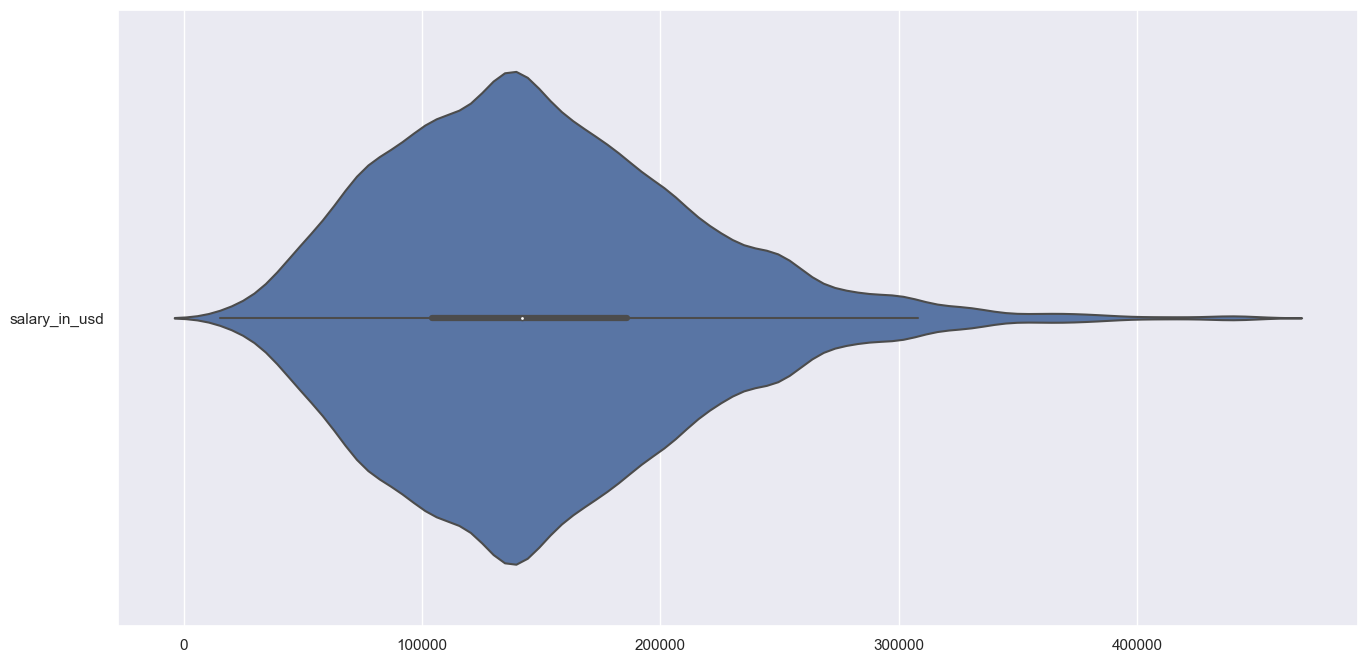

In [152]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = salary_in_usd, orient = "h")

As seen from the violin plot, the yearly salaries are widely distributed with the interquartile range being roughly between 100000 and 190000

In [153]:
salary_in_usd.describe()

,salary_in_usd
count,14199.00000
mean,149472.04944
std,64379.26016
min,15000.00000
25%,104000.00000
50%,142000.00000
75%,185900.00000
max,450000.00000


### However, these salaries are not adjusted for inflations 

In [154]:
us_inflation_rates = {2020: 0.012, 2021: 0.047, 2022: 0.080, 2023: 0.041}
global_inflation_rates = {2020: 0.032, 2021: 0.047, 2022: 0.087, 2023: 0.069}

def adjust_salary(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return int(original_salary)  # Convert to integer

    adjusted_salary = original_salary
    for y in range(year, 2023):
        if currency == 'USD':
            inflation_rate = us_inflation_rates[y]
        else:
            inflation_rate = global_inflation_rates[y]

        adjusted_salary *= (1 + inflation_rate)

    return int(round(adjusted_salary))  # Round and convert to integer

raw_Data['adjusted_salary'] = raw_Data.apply(adjust_salary, axis=1)

Since the salaries in the dataset are accrossed 4 years, 2020 - 2024, and the inflation rates within the past few years was significant, I will adjust the salaries of the previous years to bring it up to 2024 standards in order to predict what are the best

In [155]:
raw_Data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category,adjusted_salary
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research,30000
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization,230000
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization,176900
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling,171210
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling,92190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy,186575
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research,471464
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research,170745
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research,120155


In [156]:
adjusted_salary_in_usd = pd.DataFrame(raw_Data['adjusted_salary'])

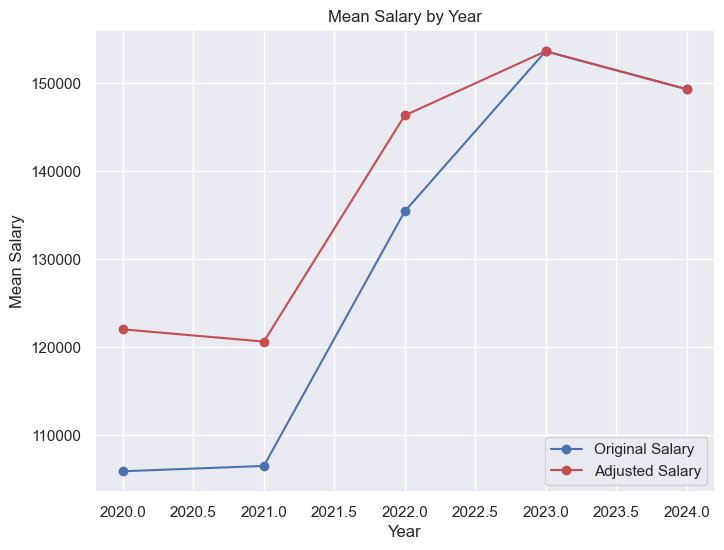

In [157]:
mean_salary_by_year_original = raw_Data.groupby('work_year')['salary_in_usd'].mean()
mean_salary_by_year_adjusted = raw_Data.groupby('work_year')['adjusted_salary'].mean()

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(mean_salary_by_year_original.index, mean_salary_by_year_original.values, marker='o', color='b', label='Original Salary')
plt.plot(mean_salary_by_year_adjusted.index, mean_salary_by_year_adjusted.values, marker='o', color='r', label='Adjusted Salary')
plt.xlabel('Year')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Year')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Cleaning the data

### Checking for missing Data

In [158]:
null_Data = raw_Data.isnull().sum()
print(null_Data)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
adjusted_salary       0
dtype: int64


No missing data was found 

### Removing the outliers

Since it wouldn't be realistic for most to receive the jobs with a outlier salary there could be erronous entry or getting scammed by being severely underpaid as compared with the rest.

In [159]:
# Outliers in adjusted_salary
Q1_SalaryData = raw_Data['adjusted_salary'].quantile(0.25)
Q3_SalaryData = raw_Data['adjusted_salary'].quantile(0.75)
IQR_SalaryData = Q3_SalaryData - Q1_SalaryData

# Identify outliers in both columns
threshold = 1.5
outlier_mask_SalaryData = (raw_Data['adjusted_salary'] < Q1_SalaryData - threshold * IQR_SalaryData) | (raw_Data['adjusted_salary'] > Q3_SalaryData + threshold * IQR_SalaryData)

# Combine outlier masks for both columns
print(outlier_mask_SalaryData.sum())
# Remove outliers from the dataset
cleaned_df = raw_Data[~outlier_mask_SalaryData]

cleaned_df.shape

231


(13968, 13)

In [160]:
cleaned_df.describe()

,work_year,salary,salary_in_usd,adjusted_salary
count,13968.000000,13968.000000,13968.000000,13968.000000
mean,2023.108963,145705.571664,146093.474943,147591.394187
std,0.685444,59766.401242,59059.676975,59305.409248
min,2020.000000,14000.000000,15000.000000,16000.000000
25%,2023.000000,100000.000000,102100.000000,104450.000000
50%,2023.000000,140100.000000,140100.000000,142200.000000
75%,2024.000000,185000.000000,185000.000000,185800.000000
max,2024.000000,409500.000000,315000.000000,315000.000000


### Removing Duplicate Data

In [161]:
duplicate_Data = cleaned_df.duplicated()
cleaned_df[duplicate_Data]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category,adjusted_salary
61,2024,Senior,Full-time,Data Scientist,190000,USD,190000,United States,Remote,United States,M,Data Science and Research,190000
62,2024,Senior,Full-time,Data Scientist,155000,USD,155000,United States,Remote,United States,M,Data Science and Research,155000
124,2024,Senior,Full-time,Data Scientist,70000,GBP,87500,United Kingdom,In-person,United Kingdom,M,Data Science and Research,87500
143,2024,Senior,Full-time,Research Scientist,234000,USD,234000,United States,In-person,United States,M,Data Science and Research,234000
144,2024,Senior,Full-time,Research Scientist,146000,USD,146000,United States,In-person,United States,M,Data Science and Research,146000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13923,2022,Mid-level,Full-time,Data Scientist,78000,USD,78000,United States,Remote,United States,M,Data Science and Research,84240
13924,2022,Senior,Full-time,Data Engineer,135000,USD,135000,United States,Remote,United States,M,Data Engineering,145800
13925,2022,Senior,Full-time,Data Engineer,115000,USD,115000,United States,Remote,United States,M,Data Engineering,124200
14058,2021,Mid-level,Full-time,Data Engineer,200000,USD,200000,United States,Remote,United States,L,Data Engineering,226152


However, we would not remove the duplicated data as it is realistic that 2 individual with the same job at the same company will draw the same salary

### Exporting the Cleaned dataset

In [184]:
cleaned_df.to_csv('cleaned_Jobs&Salaries.csv')

In [185]:
cleaned_salary_Data = cleaned_df[['work_year', 'adjusted_salary']].copy() 
cleaned_salary_Data

,work_year,adjusted_salary
0,2024,30000
1,2024,230000
2,2024,176900
3,2024,171210
4,2024,92190
...,...,...
14193,2021,32286
14194,2021,186575
14196,2021,170745
14197,2020,120155


### Basic Data Exploration

In [186]:
cleaned_salary_Data.corr()

,work_year,adjusted_salary
work_year,1.000000,0.026825
adjusted_salary,0.026825,1.000000


<Axes: >

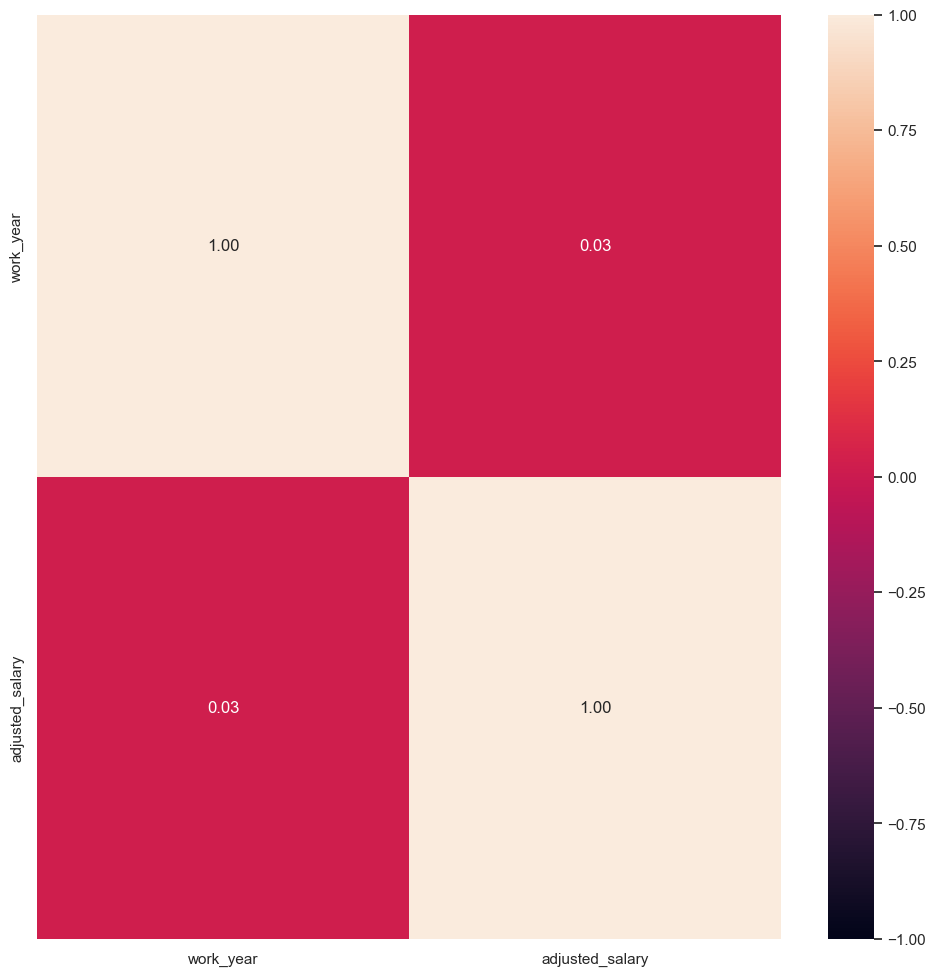

In [187]:
f = plt.figure(figsize=(12,12))
sb.heatmap(cleaned_salary_Data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

There is no corrolation between the annual salaries and work year

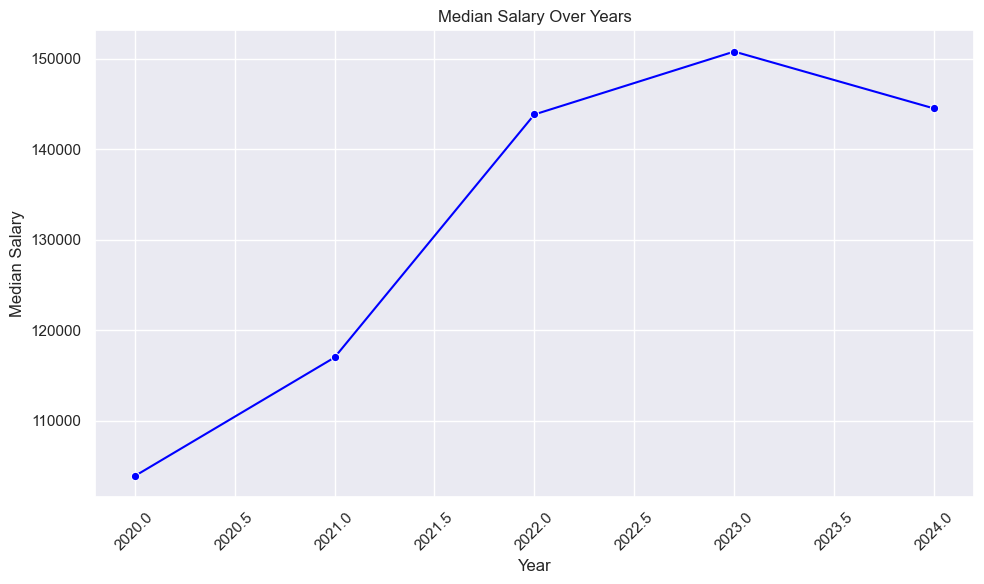

In [188]:
mean_salary_by_year = cleaned_salary_Data.groupby('work_year')['adjusted_salary'].mean().reset_index()

# Plotting line graph
plt.figure(figsize=(10, 6))
sb.lineplot(data=mean_salary_by_year, x="work_year", y="adjusted_salary", marker='o', color='blue')
plt.title('Median Salary Over Years')
plt.xlabel('Year')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

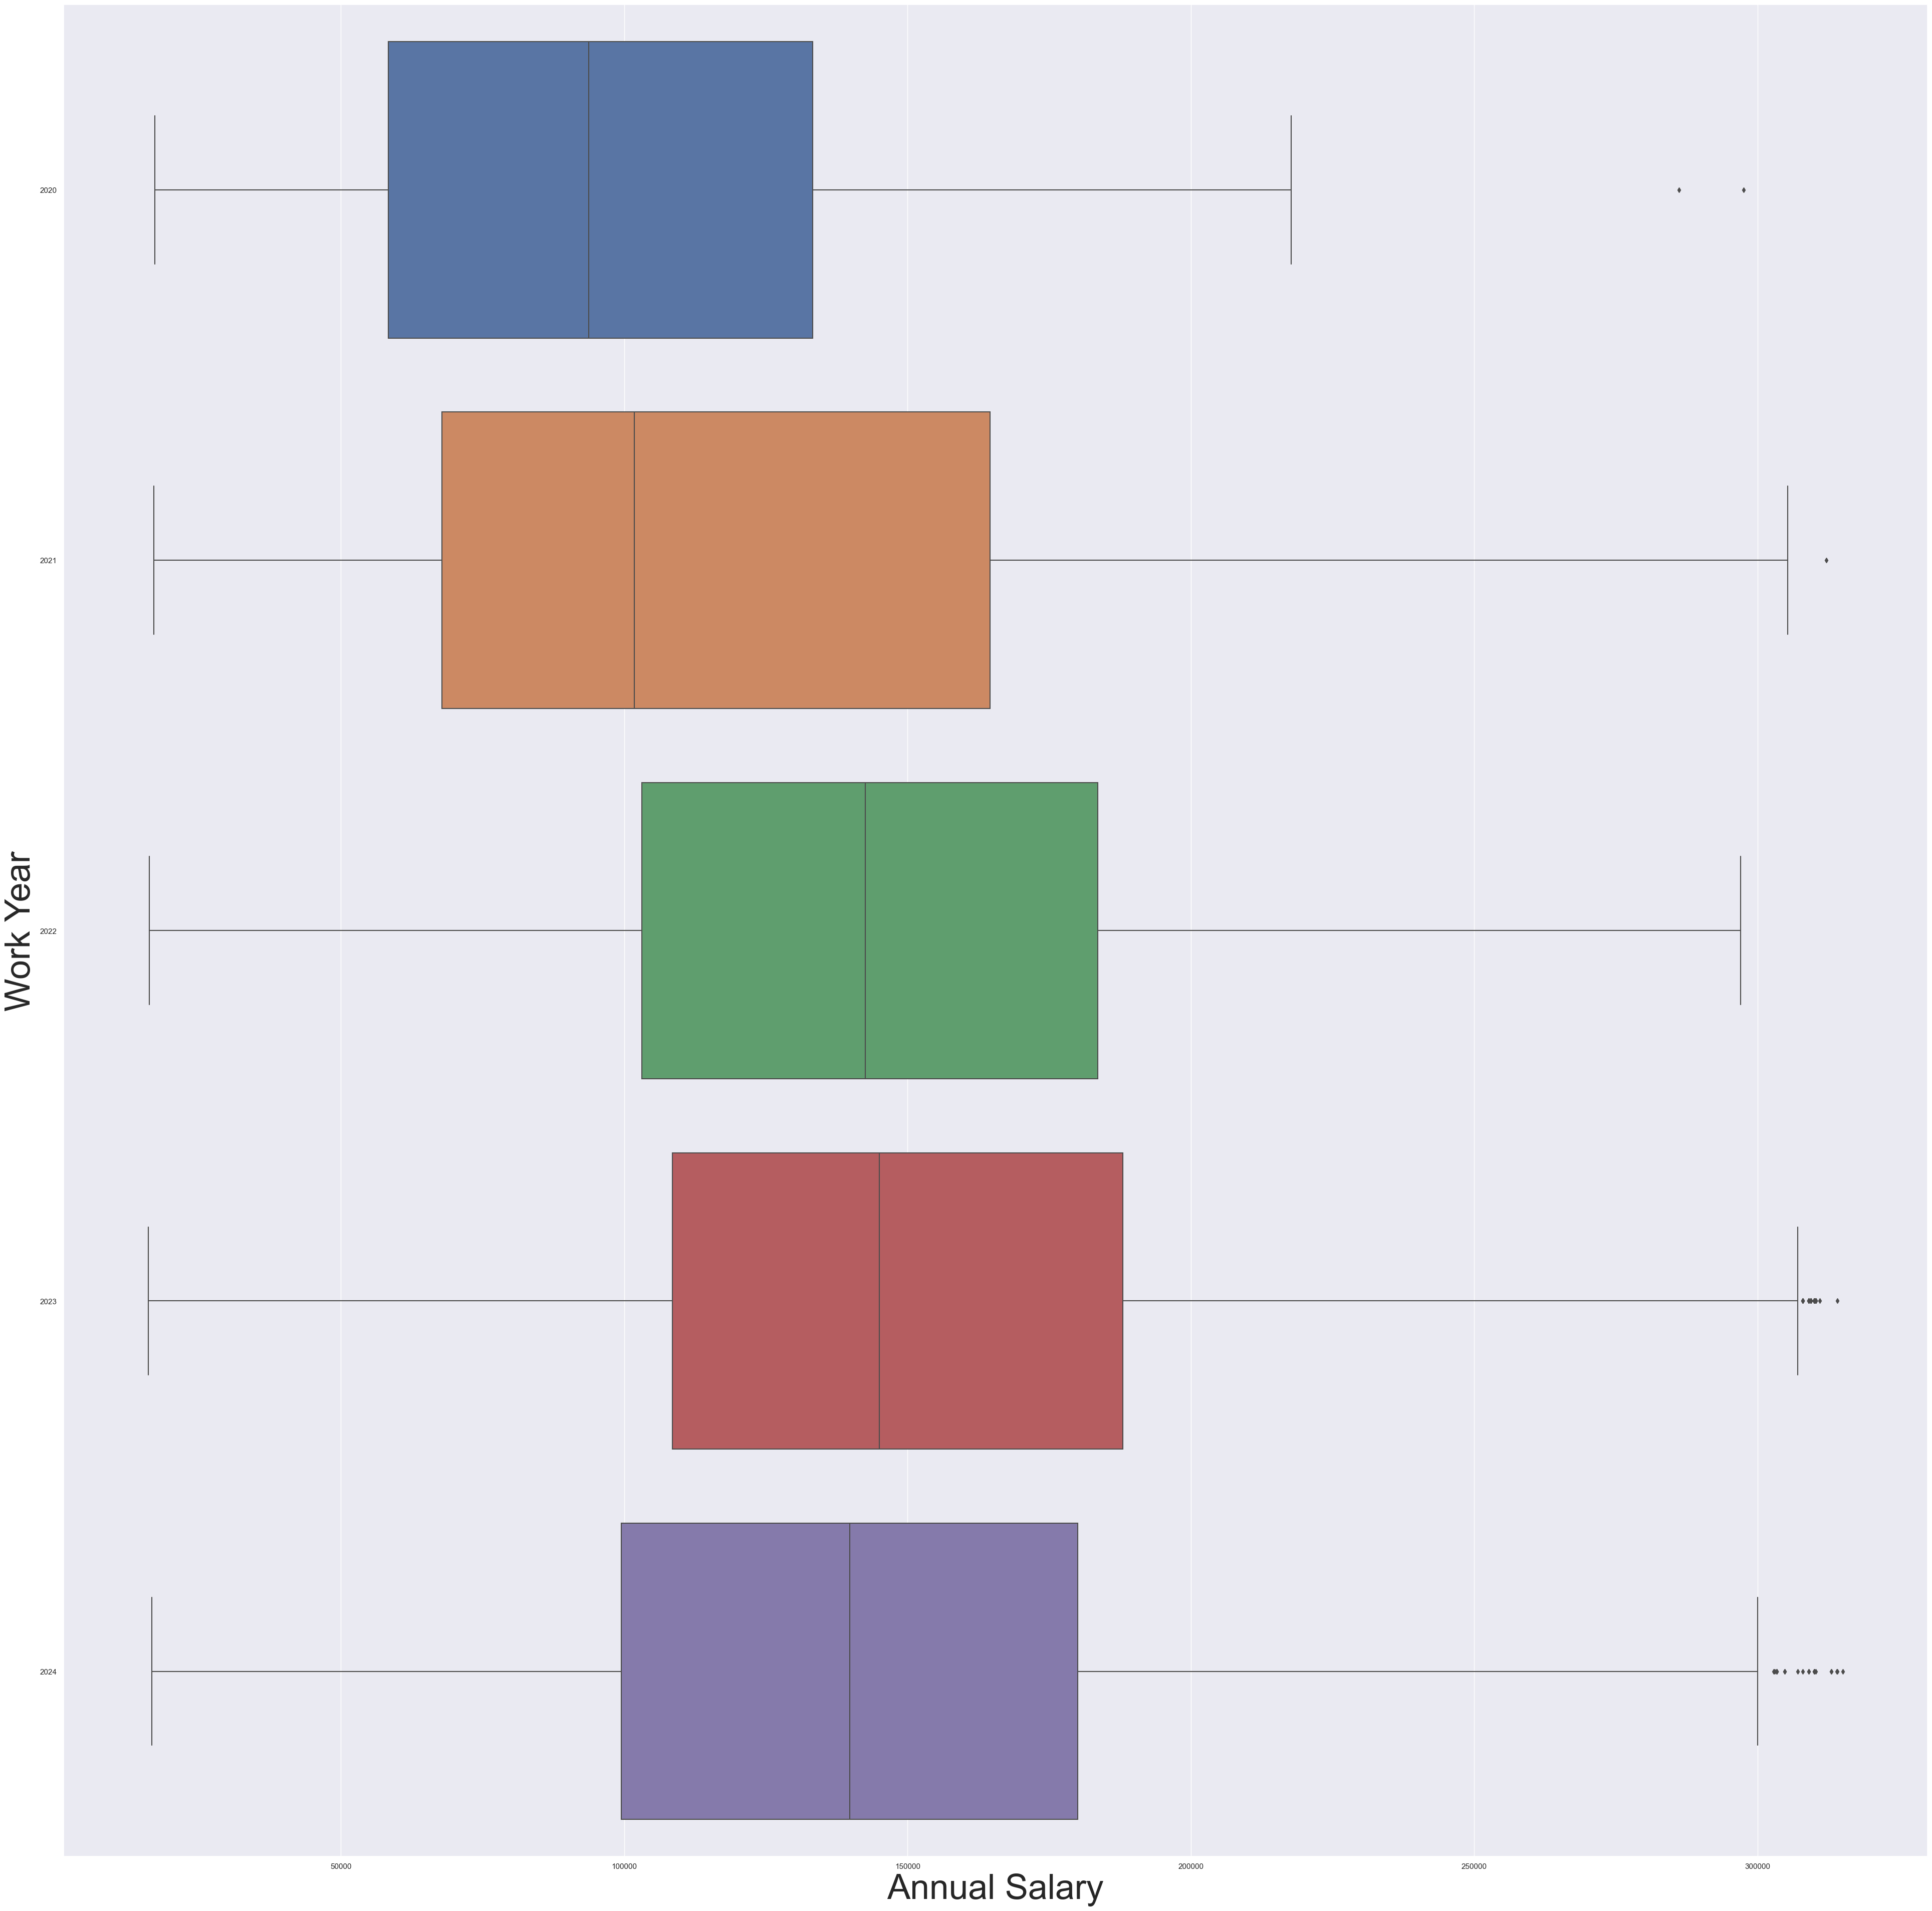

In [189]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "adjusted_salary", y = "work_year", data = cleaned_salary_Data, orient = "h",)

ax.set_xlabel("Annual Salary",fontsize=50)
ax.set_ylabel("Work Year",fontsize=50)
plt.show()

Thre is a significant increase of salary even after adjusting for inflations from year 2020 to 2023 before declining in 2024

### Categorical Data

In [190]:
cleaned_salary_Data["work_year"].value_counts()

work_year
2023    8361
2024    3729
2022    1616
2021     195
2020      67
Name: count, dtype: int64

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



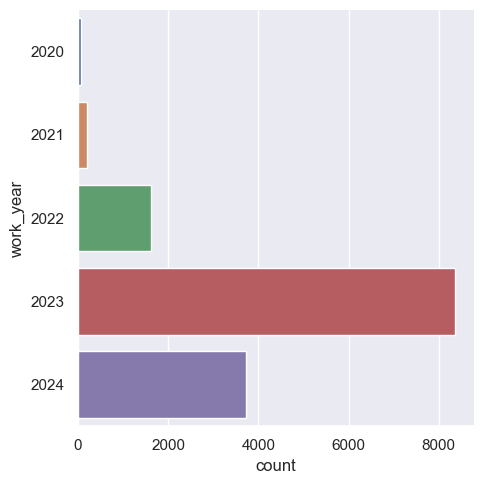

In [191]:
sb.catplot(y = "work_year", data = cleaned_salary_Data, kind = "count")


From this histogram and catplot we can see that a majority of data comes from 2023 and 2024 which will skew the accuracy of the data but not by much since the correlation between salary and work year are low.

## Heat Map

### Employment type vs Year and Salary

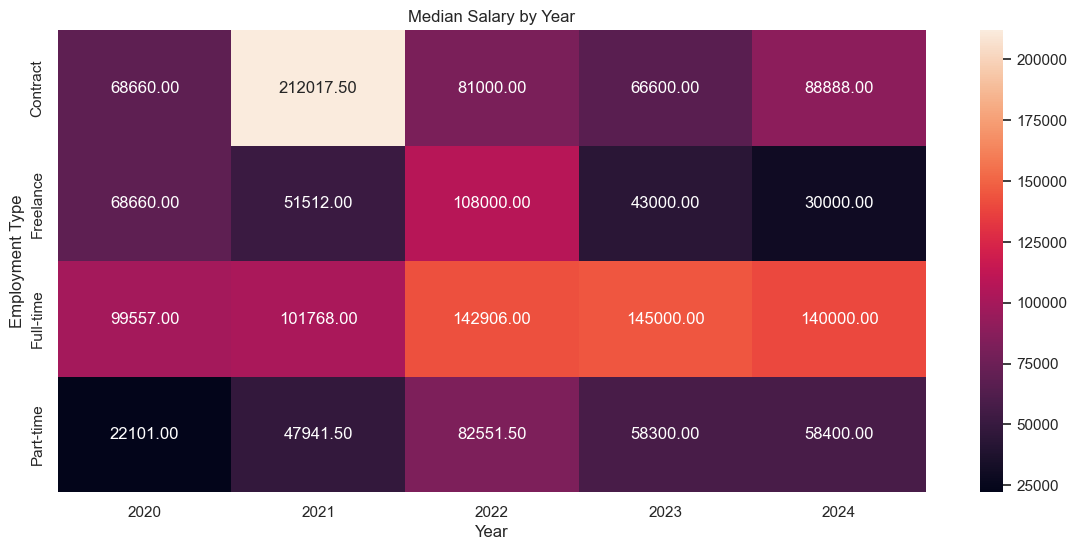

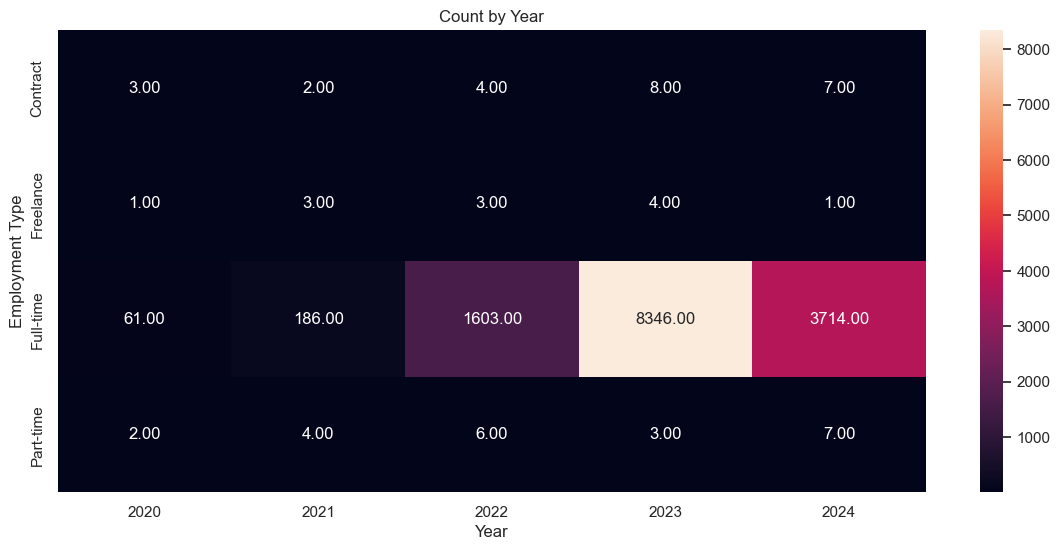

In [192]:
pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='employment_type', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Median Salary by Year')
plt.xlabel('Year')
plt.ylabel('Employment Type')
plt.show()


pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='employment_type', columns='work_year', aggfunc='count')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Count by Year')
plt.xlabel('Year')
plt.ylabel('Employment Type')
plt.show()



I found out from the heat map that full time employment pays the most and contract pays the least but there is a significant jump in salary for contract based employment in 2021, perhaps this is due to covid but it only has a count of 2.

I can also infer from the count by year heatmap that most of the data are fulltime employment from 2022 to 2024

### experience_level  vs Year and Salary

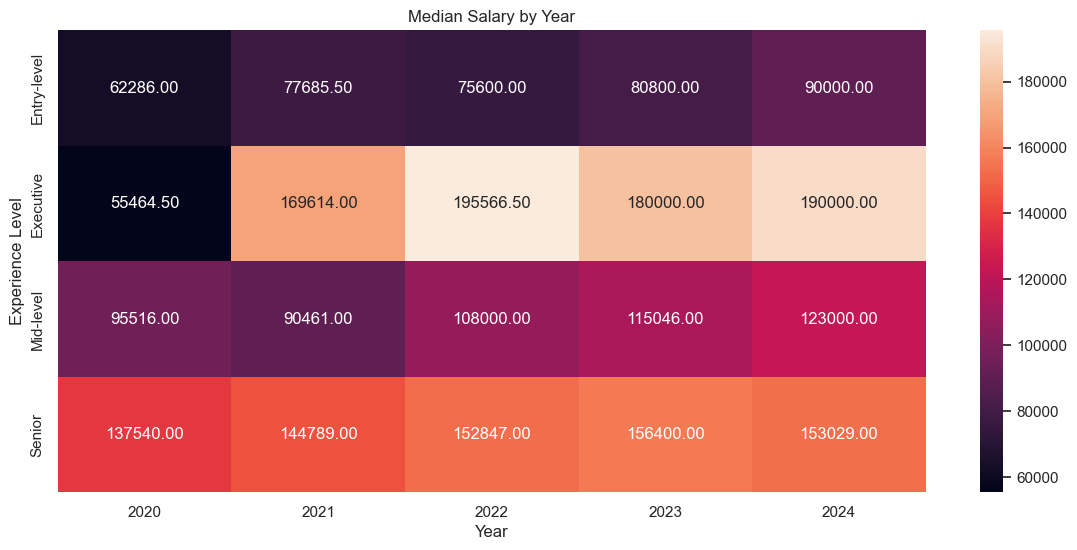

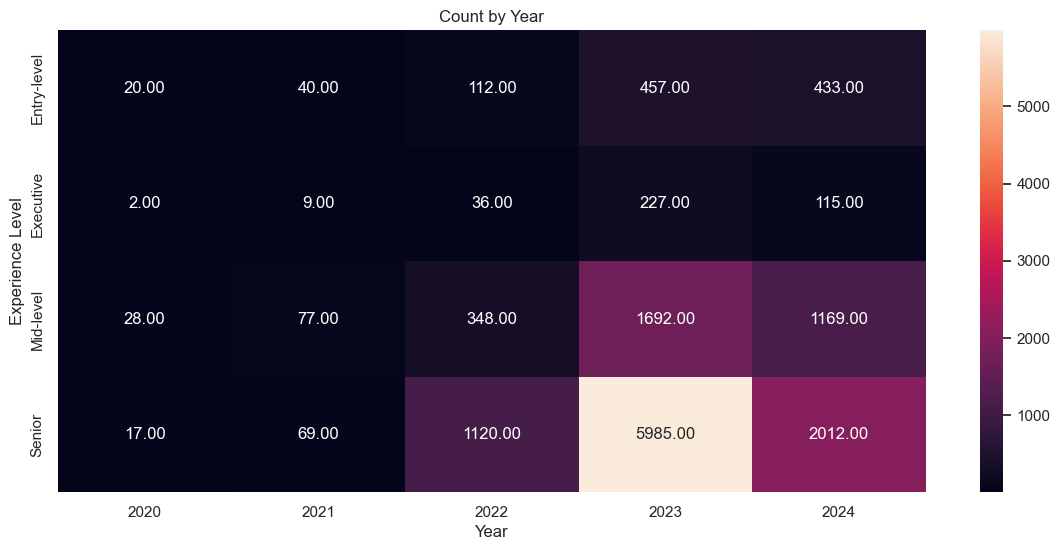

In [193]:
pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='experience_level', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Median Salary by Year')
plt.xlabel('Year')
plt.ylabel('Experience Level')
plt.show()

pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='experience_level', columns='work_year', aggfunc='count')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Count by Year')
plt.xlabel('Year')
plt.ylabel('Experience Level')
plt.show()

From the heatmaps i can see that Executive work experience pays the highest salaries as expected followed by senior, mid level and entry level but most of the data are from seniors and mid level frm 2023 to 2024

### work_setting  vs Year and Salary

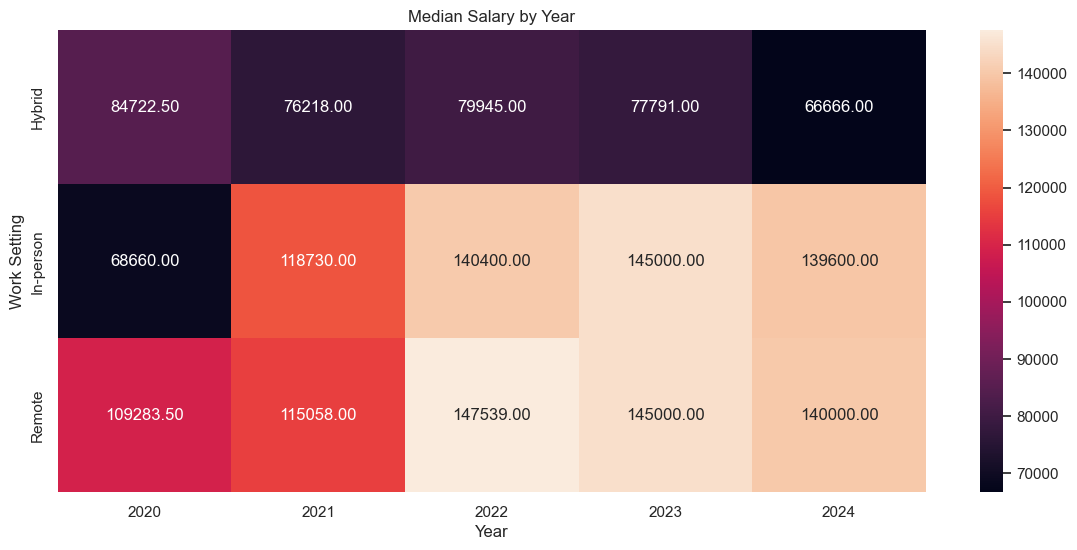

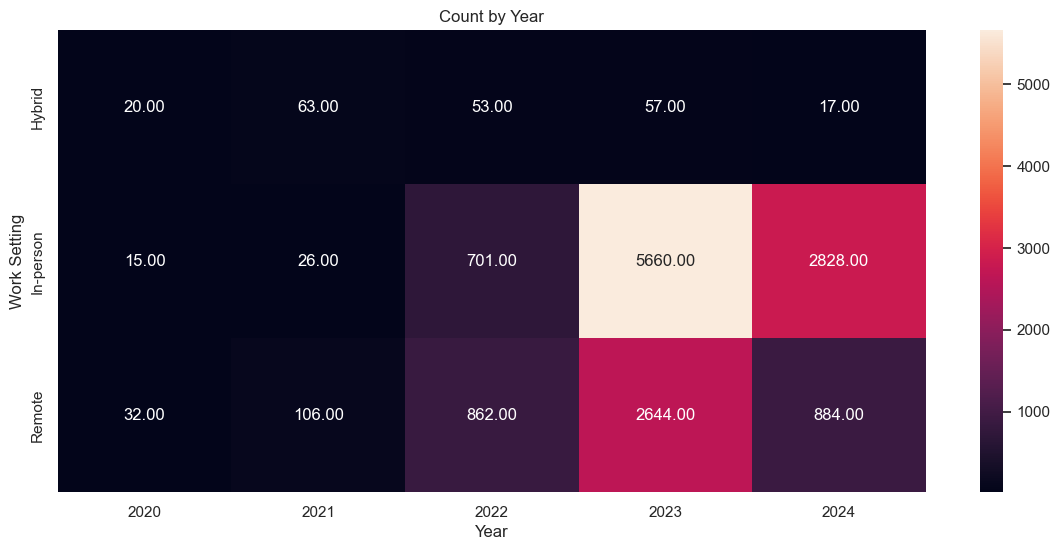

In [194]:
pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='work_setting', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Median Salary by Year')
plt.xlabel('Year')
plt.ylabel('Work Setting')

plt.show()
pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='work_setting', columns='work_year', aggfunc='count')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Count by Year')
plt.xlabel('Year')
plt.ylabel('Work Setting')
plt.show()

It is suprising to see that in person and remote work settings are compariable with their salary over the last 4 years from 2021 to 2024 but most of the data comes from in person work setting in 2023

### job_category vs Year and Salary

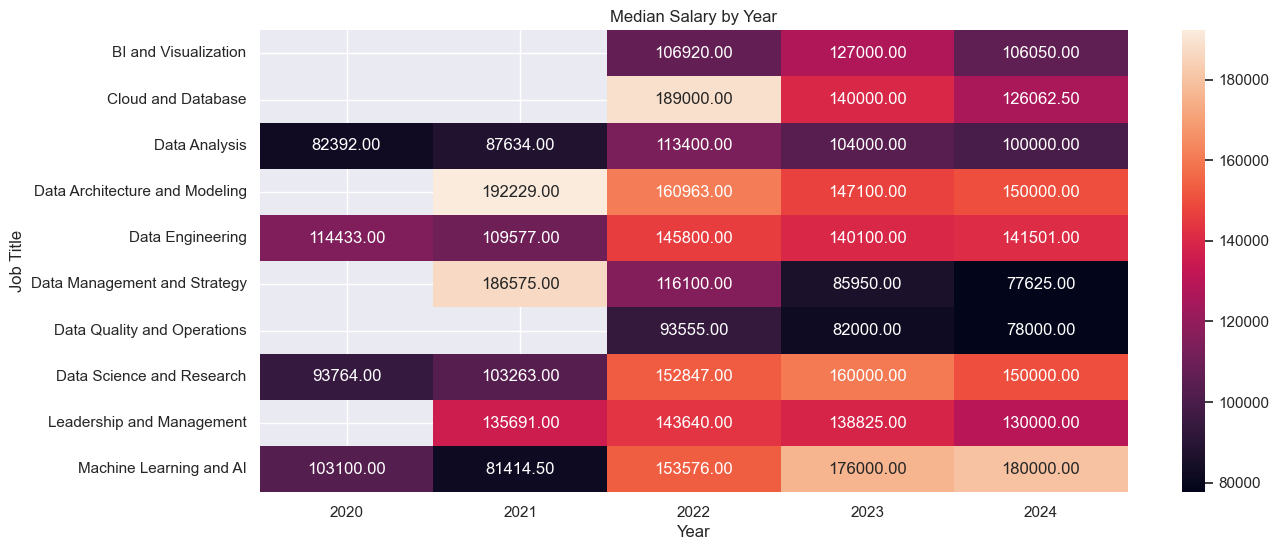

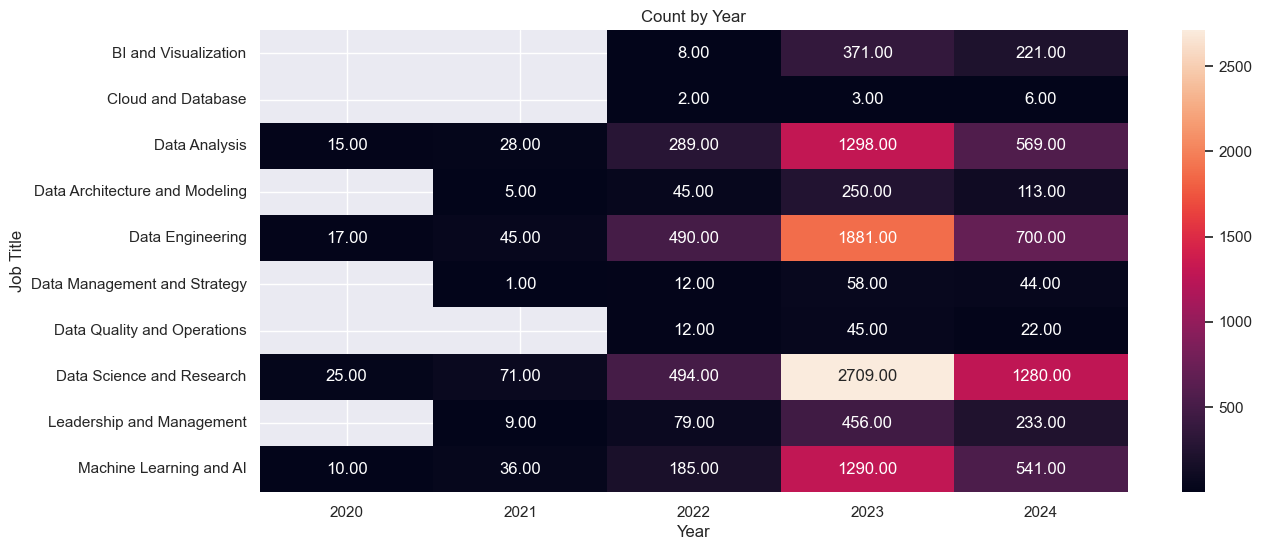

In [195]:
pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='job_category', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Median Salary by Year')
plt.xlabel('Year')
plt.ylabel('Job Title')
plt.show()

pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='job_category', columns='work_year', aggfunc='count')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Count by Year')
plt.xlabel('Year')
plt.ylabel('Job Title')
plt.show()

I can infer from the heatmaps that the highest paying jobs are in machine learning and AI and Data Science and Research and there has been an increasing trend for salary for all the jobs besides cloud and database, data structure and modelling, data management and strategy and data quality and operation 

### Geo-Spatial Analysis


### Company Location vs Salary

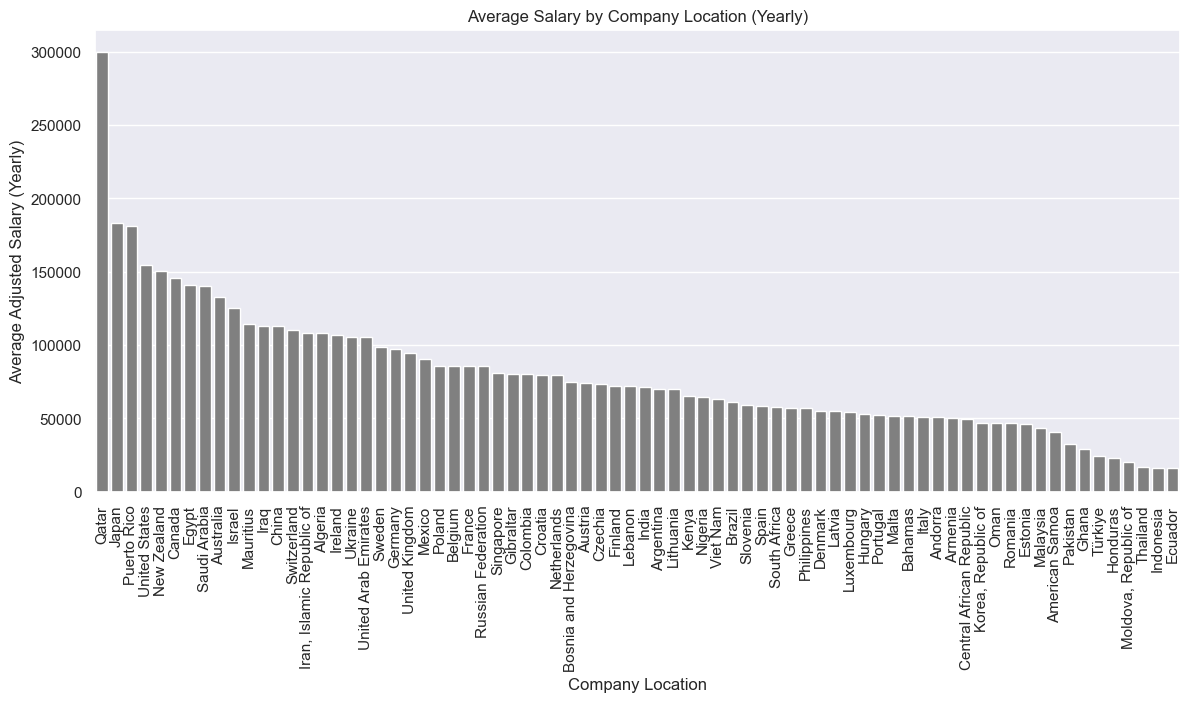

In [196]:
import plotly.express as px


avg_salary_by_location = cleaned_df.groupby('company_location', as_index=False)['adjusted_salary'].mean()

fig1 = px.choropleth(avg_salary_by_location,
                     locations='company_location',
                     locationmode='country names',
                     color='adjusted_salary',
                     hover_name='company_location',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Salary by Company Location',
                     labels={'adjusted_salary': 'Average Adjusted Salary'},
                     projection='natural earth')

fig1.show()

avg_salary_by_location = cleaned_df.groupby('company_location')['adjusted_salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sb.barplot(x=avg_salary_by_location.index, y=avg_salary_by_location, color='grey')
plt.title('Average Salary by Company Location (Yearly)')
plt.xlabel('Company Location')
plt.ylabel('Average Adjusted Salary (Yearly)')
plt.xticks(rotation=90)
plt.show()

In [197]:
country_counts = cleaned_df.groupby('company_location').count()
country_counts

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_size,job_category,adjusted_salary
company_location,,,,,,,,,,,,
Algeria,1,1,1,1,1,1,1,1,1,1,1,1
American Samoa,2,2,2,2,2,2,2,2,2,2,2,2
Andorra,1,1,1,1,1,1,1,1,1,1,1,1
Argentina,7,7,7,7,7,7,7,7,7,7,7,7
Armenia,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,10,10,10,10,10,10,10,10,10,10,10,10
United Arab Emirates,4,4,4,4,4,4,4,4,4,4,4,4
United Kingdom,617,617,617,617,617,617,617,617,617,617,617,617


### We can conclude that this data is takes place majority in the US, UK and Canada

### work_setting vs location

In [198]:
remote_100 = cleaned_df[cleaned_df['work_setting'] == 'Remote']
hybrid_100 = cleaned_df[cleaned_df['work_setting'] == 'Hybrid']
inperson_100 = cleaned_df[cleaned_df['work_setting'] == 'In-person']

all_work_settings = pd.concat([remote_100, hybrid_100, inperson_100])

# Group by country and count the occurrences of each work setting
country_counts = all_work_settings.groupby('company_location')['work_setting'].value_counts().unstack(fill_value=0)

# Find the highest work setting for each country
country_counts['highest_work_setting'] = country_counts.idxmax(axis=1)

# Create a new DataFrame with country names and highest work setting
country_summary = country_counts[['highest_work_setting']].reset_index()

# Rename columns for clarity
country_summary.columns = ['country_name', 'highest_work_setting']

# Create the choropleth map
fig = px.choropleth(country_summary, 
                    locations='country_name', 
                    locationmode='country names',
                    color='highest_work_setting', 
                    hover_name='country_name',
                    color_discrete_sequence=px.colors.qualitative.Set1,
                    title='Highest Work Setting per Country',
                    projection='natural earth')

fig.show()

The North America, East Asia, Australia and most of european countries preferred in-person work setting while South America, Russia and East and SEA preferred remote work settings. 

### Removing unnecessary variables

In [199]:
trimmed_df = cleaned_df.drop(["salary", "salary_currency", "salary_in_usd"], axis=1)
trimmed_df

,work_year,experience_level,employment_type,job_title,employee_residence,work_setting,company_location,company_size,job_category,adjusted_salary
0,2024,Entry-level,Freelance,Applied Data Scientist,United Kingdom,Remote,United Kingdom,M,Data Science and Research,30000
1,2024,Executive,Full-time,Business Intelligence,United States,In-person,United States,M,BI and Visualization,230000
2,2024,Executive,Full-time,Business Intelligence,United States,In-person,United States,M,BI and Visualization,176900
3,2024,Senior,Full-time,Data Architect,Canada,In-person,Canada,M,Data Architecture and Modeling,171210
4,2024,Senior,Full-time,Data Architect,Canada,In-person,Canada,M,Data Architecture and Modeling,92190
...,...,...,...,...,...,...,...,...,...,...
14193,2021,Mid-level,Full-time,Data Engineer,Malta,Hybrid,Malta,L,Data Engineering,32286
14194,2021,Senior,Full-time,Data Specialist,United States,Remote,United States,L,Data Management and Strategy,186575
14196,2021,Mid-level,Full-time,Principal Data Scientist,United States,Remote,United States,L,Data Science and Research,170745
14197,2020,Entry-level,Full-time,Data Scientist,United States,Remote,United States,S,Data Science and Research,120155


### Changing all the categorical datas into numerical representations


In [200]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame 'df' with a categorical column 'Category'
le = LabelEncoder()
trimmed_df['experience_level'] = le.fit_transform(trimmed_df['experience_level'])
trimmed_df['employment_type'] = le.fit_transform(trimmed_df['employment_type'])
trimmed_df['job_title'] = le.fit_transform(trimmed_df['job_title'])
trimmed_df['work_setting'] = le.fit_transform(trimmed_df['work_setting'])
trimmed_df['company_location'] = le.fit_transform(trimmed_df['company_location'])
trimmed_df['company_size'] = le.fit_transform(trimmed_df['experience_level'])
trimmed_df['job_category'] = le.fit_transform(trimmed_df['job_category'])
trimmed_df['employee_residence'] = le.fit_transform(trimmed_df['employee_residence'])
trimmed_df

,work_year,experience_level,employment_type,job_title,employee_residence,work_setting,company_location,company_size,job_category,adjusted_salary
0,2024,0,1,12,82,2,71,0,7,30000
1,2024,1,2,26,83,1,72,1,0,230000
2,2024,1,2,26,83,1,72,1,0,176900
3,2024,3,2,50,12,1,11,3,3,171210
4,2024,3,2,50,12,1,11,3,3,92190
...,...,...,...,...,...,...,...,...,...,...
14193,2021,2,2,53,51,0,44,2,4,32286
14194,2021,3,2,87,83,2,72,3,5,186575
14196,2021,2,2,132,83,2,72,2,7,170745
14197,2020,0,2,85,83,2,72,0,7,120155


In [201]:
for column in ['experience_level', 'employment_type', 'job_title', 'work_setting', 
               'company_location', 'company_size', 'job_category', 'employee_residence']:
    print(f"Mapping for '{column}':")
    print(dict(zip(le.classes_, le.transform(le.classes_))))
    print()

Mapping for 'experience_level':
{'Algeria': 0, 'American Samoa': 1, 'Andorra': 2, 'Argentina': 3, 'Armenia': 4, 'Australia': 5, 'Austria': 6, 'Belgium': 7, 'Bolivia, Plurinational State of': 8, 'Bosnia and Herzegovina': 9, 'Brazil': 10, 'Bulgaria': 11, 'Canada': 12, 'Central African Republic': 13, 'Chile': 14, 'China': 15, 'Colombia': 16, 'Costa Rica': 17, 'Croatia': 18, 'Cyprus': 19, 'Czechia': 20, 'Denmark': 21, 'Dominican Republic': 22, 'Ecuador': 23, 'Egypt': 24, 'Estonia': 25, 'Finland': 26, 'France': 27, 'Georgia': 28, 'Germany': 29, 'Ghana': 30, 'Greece': 31, 'Honduras': 32, 'Hong Kong': 33, 'Hungary': 34, 'India': 35, 'Indonesia': 36, 'Iran, Islamic Republic of': 37, 'Iraq': 38, 'Ireland': 39, 'Italy': 40, 'Japan': 41, 'Jersey': 42, 'Kenya': 43, 'Korea, Republic of': 44, 'Kuwait': 45, 'Latvia': 46, 'Lebanon': 47, 'Lithuania': 48, 'Luxembourg': 49, 'Malaysia': 50, 'Malta': 51, 'Mauritius': 52, 'Mexico': 53, 'Moldova, Republic of': 54, 'Netherlands': 55, 'New Zealand': 56, 'Niger

# This are all the numerial conversion of all the categories 

### Converting salary after accounting for inflation into 10 bins, with 9 being the highest paying salary group

In [202]:
quantiles = [0, 1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 1]
bin_edges = [trimmed_df['adjusted_salary'].quantile(q) for q in quantiles]

# Convert the continuous salary variable into 7 discrete bins based on quantiles
salary_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
trimmed_df['salary_range'] = pd.cut(trimmed_df['adjusted_salary'], bins=bin_edges, labels=salary_labels, include_lowest=True)

trimmed_df.to_csv('NumericSalaries.csv')
trimmed_df

,work_year,experience_level,employment_type,job_title,employee_residence,work_setting,company_location,company_size,job_category,adjusted_salary,salary_range
0,2024,0,1,12,82,2,71,0,7,30000,0
1,2024,1,2,26,83,1,72,1,0,230000,8
2,2024,1,2,26,83,1,72,1,0,176900,7
3,2024,3,2,50,12,1,11,3,3,171210,6
4,2024,3,2,50,12,1,11,3,3,92190,1
...,...,...,...,...,...,...,...,...,...,...,...
14193,2021,2,2,53,51,0,44,2,4,32286,0
14194,2021,3,2,87,83,2,72,3,5,186575,7
14196,2021,2,2,132,83,2,72,2,7,170745,6
14197,2020,0,2,85,83,2,72,0,7,120155,3


In [203]:
for i in range(len(bin_edges) - 1):
    lower_bound = bin_edges[i]
    upper_bound = bin_edges[i + 1]
    salary_range = f"{salary_labels[i]}: [{lower_bound}, {upper_bound})"
    print(salary_range)

0: [16000.0, 73100.0)
1: [73100.0, 94000.0)
2: [94000.0, 111800.0)
3: [111800.0, 129600.0)
4: [129600.0, 142200.0)
5: [142200.0, 159000.0)
6: [159000.0, 175000.0)
7: [175000.0, 200000.0)
8: [200000.0, 230000.0)
9: [230000.0, 315000.0)


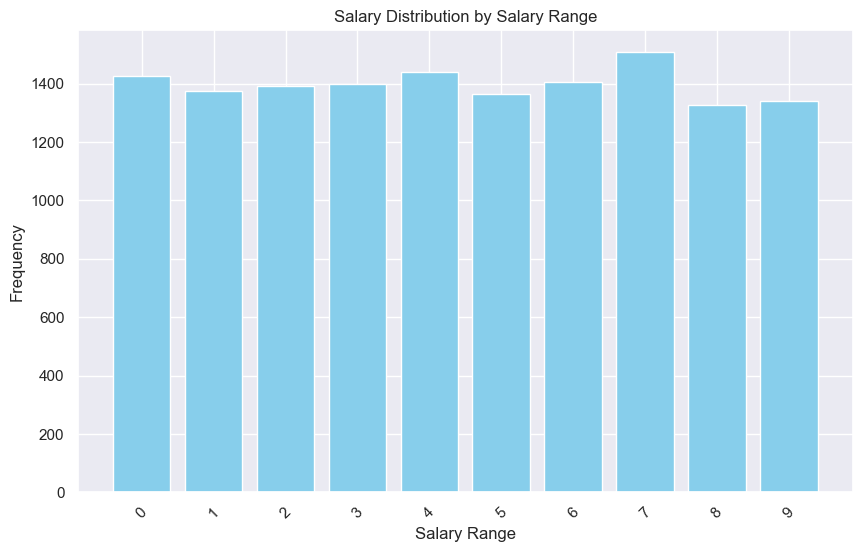

In [204]:
salary_bin_counts = trimmed_df['salary_range'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(salary_bin_counts.index, salary_bin_counts.values, color='skyblue')
plt.title('Salary Distribution by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

This shows the range of salary in each bins and the frequency of every bins

In [205]:
trimmed_df = trimmed_df.drop(["adjusted_salary"], axis=1)
trimmed_df

,work_year,experience_level,employment_type,job_title,employee_residence,work_setting,company_location,company_size,job_category,salary_range
0,2024,0,1,12,82,2,71,0,7,0
1,2024,1,2,26,83,1,72,1,0,8
2,2024,1,2,26,83,1,72,1,0,7
3,2024,3,2,50,12,1,11,3,3,6
4,2024,3,2,50,12,1,11,3,3,1
...,...,...,...,...,...,...,...,...,...,...
14193,2021,2,2,53,51,0,44,2,4,0
14194,2021,3,2,87,83,2,72,3,5,7
14196,2021,2,2,132,83,2,72,2,7,6
14197,2020,0,2,85,83,2,72,0,7,3


Dropping adjusted salary since I had already grouped the salaries into 10 bins

### Correlation between adjusted salary and other variables


In [206]:
correlation_matrix = trimmed_df.corr()
correlation_matrix

,work_year,experience_level,employment_type,job_title,employee_residence,work_setting,company_location,company_size,job_category,salary_range
work_year,1.000000,-0.053023,0.023981,0.004508,0.096636,-0.113106,0.087889,-0.053023,0.003665,0.021376
experience_level,-0.053023,1.000000,0.000170,0.063761,0.088660,0.063476,0.084901,1.000000,0.119814,0.318772
employment_type,0.023981,0.000170,1.000000,-0.005633,0.031350,-0.024445,0.026075,0.000170,-0.009117,0.024458
job_title,0.004508,0.063761,-0.005633,1.000000,-0.011932,-0.070295,-0.018324,0.063761,0.606780,0.217598
employee_residence,0.096636,0.088660,0.031350,-0.011932,1.000000,0.009822,0.965576,0.088660,-0.042278,0.155651
work_setting,-0.113106,0.063476,-0.024445,-0.070295,0.009822,1.000000,0.020488,0.063476,-0.041276,0.018830
company_location,0.087889,0.084901,0.026075,-0.018324,0.965576,0.020488,1.000000,0.084901,-0.041948,0.150411
company_size,-0.053023,1.000000,0.000170,0.063761,0.088660,0.063476,0.084901,1.000000,0.119814,0.318772
job_category,0.003665,0.119814,-0.009117,0.606780,-0.042278,-0.041276,-0.041948,0.119814,1.000000,0.305304
salary_range,0.021376,0.318772,0.024458,0.217598,0.155651,0.018830,0.150411,0.318772,0.305304,1.000000


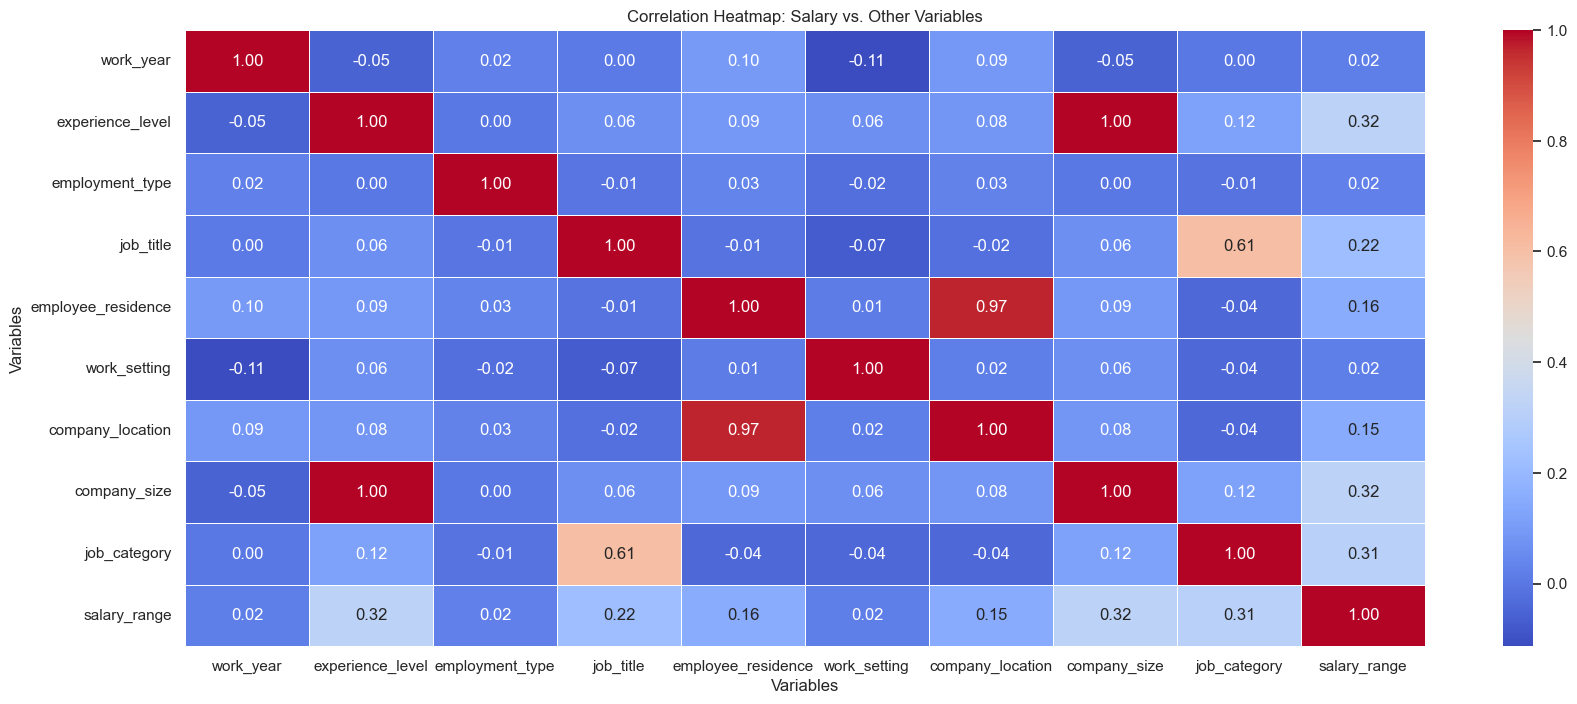

In [207]:
plt.figure(figsize=(20, 8))  # Set the figure size

# Plot the heatmap
sb.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Customize the plot (add labels, title, etc.)
plt.title("Correlation Heatmap: Salary vs. Other Variables")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Show the plot
plt.show()

We can see that experience level, company size and job category has the biggest correlation with salary

we will remove work year, employment type and work setting as they have close to 0 corralation

I will remove job title as well as it is similar to job category but having quite a number of job titles with a frequency of 1.

In [208]:
trimmed_df = trimmed_df.drop(["work_year", "employment_type", "work_setting", "job_title"], axis=1)
trimmed_df

,experience_level,employee_residence,company_location,company_size,job_category,salary_range
0,0,82,71,0,7,0
1,1,83,72,1,0,8
2,1,83,72,1,0,7
3,3,12,11,3,3,6
4,3,12,11,3,3,1
...,...,...,...,...,...,...
14193,2,51,44,2,4,0
14194,3,83,72,3,5,7
14196,2,83,72,2,7,6
14197,0,83,72,0,7,3


In [209]:
value_counts = trimmed_df['company_location'].value_counts()

# Identify values that appear only once
values_to_drop = value_counts[value_counts < 10].index

# Drop rows with those values
trimmed_df = trimmed_df[~trimmed_df['company_location'].isin(values_to_drop)]

trimmed_df

,experience_level,employee_residence,company_location,company_size,job_category,salary_range
0,0,82,71,0,7,0
1,1,83,72,1,0,8
2,1,83,72,1,0,7
3,3,12,11,3,3,6
4,3,12,11,3,3,1
...,...,...,...,...,...,...
14188,2,73,72,2,4,5
14194,3,83,72,3,5,7
14196,2,83,72,2,7,6
14197,0,83,72,0,7,3


I dropped the rows of company locations with frequencies below 10 since it keeps giving me an error while plotting the graphs

In [210]:
from sklearn.model_selection import train_test_split

X = trimmed_df.drop('salary_range', axis=1)
y = trimmed_df[['salary_range']]

splitting the dataset into X and y where X are the variables used to predict y, the salary range.

In [211]:
from sklearn.preprocessing import OrdinalEncoder

# Encode y to numeric
y_encoded = OrdinalEncoder().fit_transform(y)

y_encoded

array([[0.],
       [8.],
       [7.],
       ...,
       [6.],
       [3.],
       [3.]])

In [212]:
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to pd.Categorical
for col in cats:
   X[col] = X[col].astype('category')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=1, stratify=y_encoded)

splitting the dataset into train and test, 75:25

## XGBoost (Extreme Gradient Boosting)

In [45]:
import xgboost as xgb

# Create regression matrices
dtrain_clf = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [46]:
params = {"objective": "multi:softprob", "tree_method" : "hist", "device" : "cuda", "num_class": 10}
n = 1000

results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"],
)

i applied xgboost at 1000 iteration with 5 folds in cross validation to predict the multiclass logloss, area under roc curve and multiclass error.

In [47]:
results.keys()

Index(['train-mlogloss-mean', 'train-mlogloss-std', 'train-auc-mean',
       'train-auc-std', 'train-merror-mean', 'train-merror-std',
       'test-mlogloss-mean', 'test-mlogloss-std', 'test-auc-mean',
       'test-auc-std', 'test-merror-mean', 'test-merror-std'],
      dtype='object')

In [48]:
results['train-auc-mean'].mean()

0.7019264697862834

In [49]:
results['test-mlogloss-mean'].mean()

2.147528277393869

In [50]:
results['test-merror-mean'].mean()

0.8035517412421541

In [51]:
results['test-auc-mean'].mean()

0.663929875172248

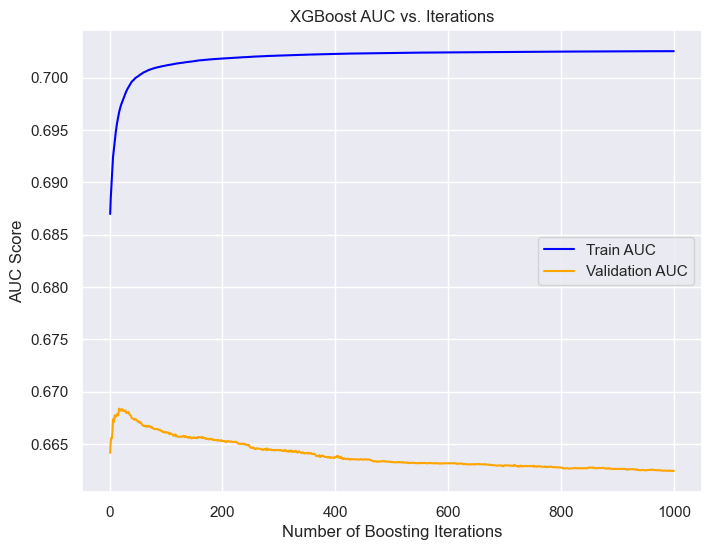

In [52]:
train_auc = results['train-auc-mean']
test_auc = results['test-auc-mean']

# Create x-axis (number of boosting iterations)
num_iterations = len(train_auc)
x_axis = range(1, num_iterations + 1)

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_auc, label='Train AUC', color='blue')
plt.plot(x_axis, test_auc, label='Validation AUC', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('AUC Score')
plt.title('XGBoost AUC vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()


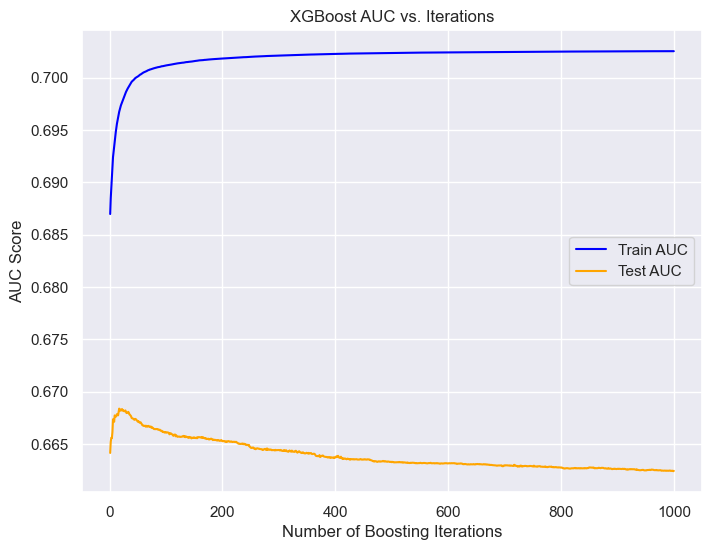

In [53]:
train_auc = results['train-auc-mean']
test_auc = results['test-auc-mean']

# Create x-axis (number of boosting iterations)
num_iterations = len(train_auc)
x_axis = range(1, num_iterations + 1)

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_auc, label='Train AUC', color='blue')
plt.plot(x_axis, test_auc, label='Test AUC', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('AUC Score')
plt.title('XGBoost AUC vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()


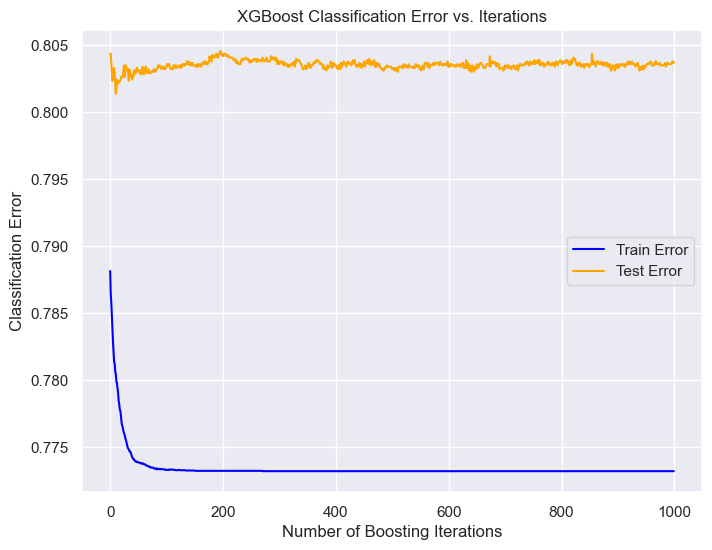

In [54]:
epochs = len(results['train-merror-mean'])  # Replace with actual key names
x_axis = range(0, epochs)

# Plot classification error
plt.figure(figsize=(8, 6))
plt.plot(x_axis, results['train-merror-mean'], label='Train Error', color='blue')
plt.plot(x_axis, results['test-merror-mean'], label='Test Error', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
results['test-auc-mean'].mean()

0.663929875172248

In [56]:
results['test-merror-mean'].min()

0.8013894025262118

### Analysis

The XGBoost results

test->mean
area under ROC curve = 0.663929875172248
multi class error = 0.8013894025262118

Since the area under ROC curve and multiclass error are relatively high and by looking at the shape of the train graph, I can conclude that the test model might be overfitted

### Trying to increase AUC and decrease error

In [57]:
from xgboost import XGBClassifier

final_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=results.shape[0],  # Use the number of boosting rounds from cross-validation
    tree_method='hist',
    device='cuda',
    num_class=10
)

# Train the final model on the entire training data
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, num_class=10,
              num_parallel_tree=None, ...)

In [58]:
X_test

,experience_level,employee_residence,company_location,company_size,job_category
12745,2,83,72,2,4
5979,2,83,72,2,2
12953,1,83,72,1,8
9876,3,83,72,3,9
467,0,83,72,0,2
...,...,...,...,...,...
102,2,83,72,2,7
13254,3,83,72,3,7
12831,3,83,72,3,4
11772,3,83,72,3,2


[0]	validation_0-mlogloss:2.27369	validation_1-mlogloss:2.27341
[1]	validation_0-mlogloss:2.24993	validation_1-mlogloss:2.24986
[2]	validation_0-mlogloss:2.22964	validation_1-mlogloss:2.23012
[3]	validation_0-mlogloss:2.21183	validation_1-mlogloss:2.21324


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[4]	validation_0-mlogloss:2.19612	validation_1-mlogloss:2.19833
[5]	validation_0-mlogloss:2.18219	validation_1-mlogloss:2.18526
[6]	validation_0-mlogloss:2.16972	validation_1-mlogloss:2.17378
[7]	validation_0-mlogloss:2.15851	validation_1-mlogloss:2.16359
[8]	validation_0-mlogloss:2.14834	validation_1-mlogloss:2.15441
[9]	validation_0-mlogloss:2.13920	validation_1-mlogloss:2.14627
[10]	validation_0-mlogloss:2.13089	validation_1-mlogloss:2.13895
[11]	validation_0-mlogloss:2.12324	validation_1-mlogloss:2.13222
[12]	validation_0-mlogloss:2.11631	validation_1-mlogloss:2.12618
[13]	validation_0-mlogloss:2.10972	validation_1-mlogloss:2.12060
[14]	validation_0-mlogloss:2.10369	validation_1-mlogloss:2.11547
[15]	validation_0-mlogloss:2.09807	validation_1-mlogloss:2.11083
[16]	validation_0-mlogloss:2.09294	validation_1-mlogloss:2.10664
[17]	validation_0-mlogloss:2.08833	validation_1-mlogloss:2.10294
[18]	validation_0-mlogloss:2.08381	validation_1-mlogloss:2.09954
[19]	validation_0-mlogloss:2.07

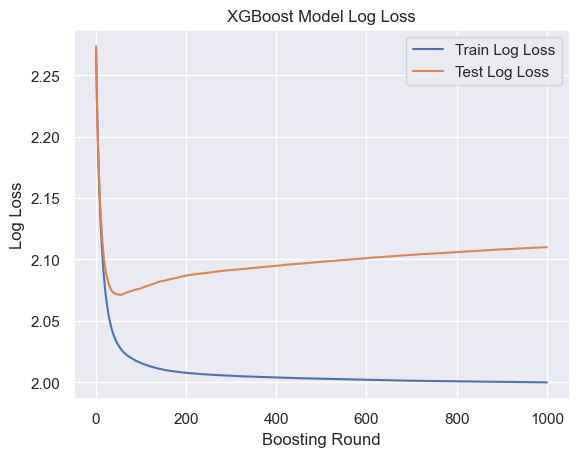

In [59]:
final_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=results.shape[0],  # Use the number of boosting rounds from cross-validation
    tree_method='hist',
    device='cuda',
    num_class=10
)

# Specify eval_set with validation data
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the final model with eval_set
final_model.fit(X_train, y_train, eval_set=eval_set, eval_metric='mlogloss', verbose=True)

# Plot accuracy
train_accuracy = final_model.evals_result()['validation_0']['mlogloss']
val_accuracy = final_model.evals_result()['validation_1']['mlogloss']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Log Loss')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test Log Loss')

plt.title('XGBoost Model Log Loss')
plt.xlabel('Boosting Round')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

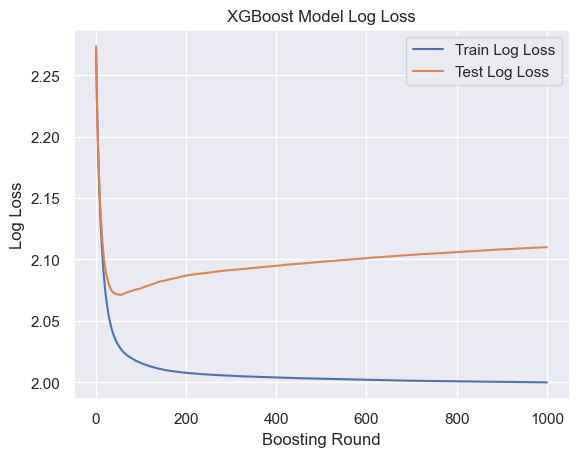

In [60]:
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Log Loss')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test Log Loss')

plt.title('XGBoost Model Log Loss')
plt.xlabel('Boosting Round')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

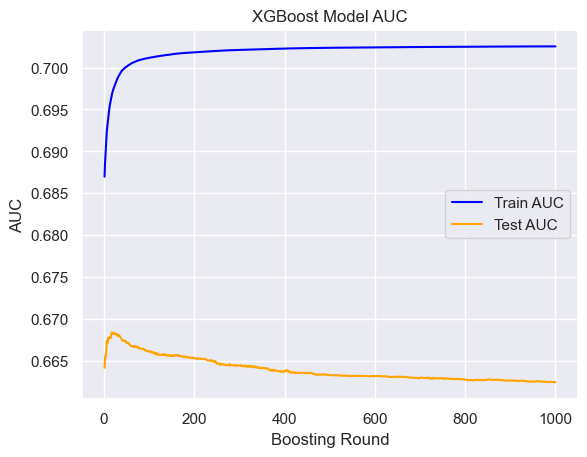

In [61]:
import matplotlib.pyplot as plt

# Assuming you have train_auc and val_auc (lists or arrays)
# Replace them with your actual AUC values

# Plot training AUC
plt.plot(range(1, len(train_auc) + 1), train_auc, label='Train AUC', color='blue')

# Plot validation AUC
plt.plot(range(1, len(test_auc) + 1), test_auc, label='Test AUC', color='orange')

plt.title('XGBoost Model AUC')
plt.xlabel('Boosting Round')
plt.ylabel('AUC')
plt.legend()
plt.show()


In [62]:
import xgboost as xgb
import numpy as np

# Assuming you already have your dtrain_clf dataset

# Define your parameters
params = {
    "objective": "multi:softprob",
    "tree_method": "hist",
    "device": "cuda",
    "num_class": 10,
    "learning_rate": 0.1  # Set your desired learning rate here
}

n = 1000

results = xgb.cv(
    params,
    dtrain_clf,
    num_boost_round=n,
    nfold=5,
    metrics=["mlogloss", "auc", "merror"],
)



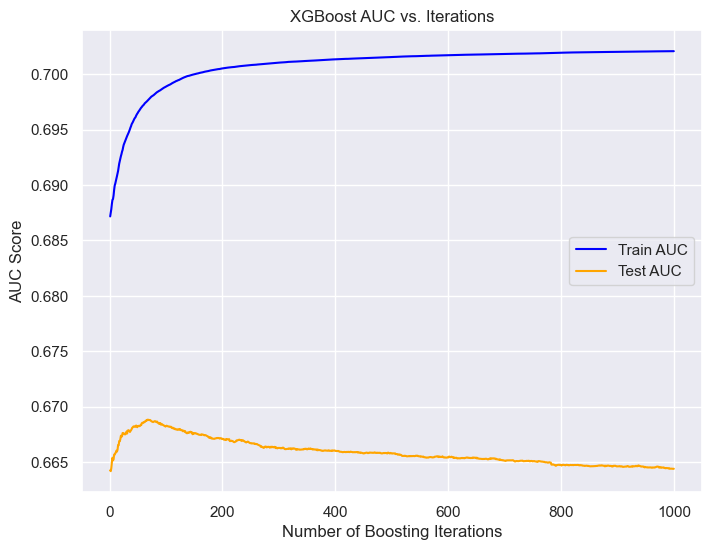

In [63]:
train_auc = results['train-auc-mean']
test_auc = results['test-auc-mean']

# Create x-axis (number of boosting iterations)
num_iterations = len(train_auc)
x_axis = range(1, num_iterations + 1)

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_auc, label='Train AUC', color='blue')
plt.plot(x_axis, test_auc, label='Test AUC', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('AUC Score')
plt.title('XGBoost AUC vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

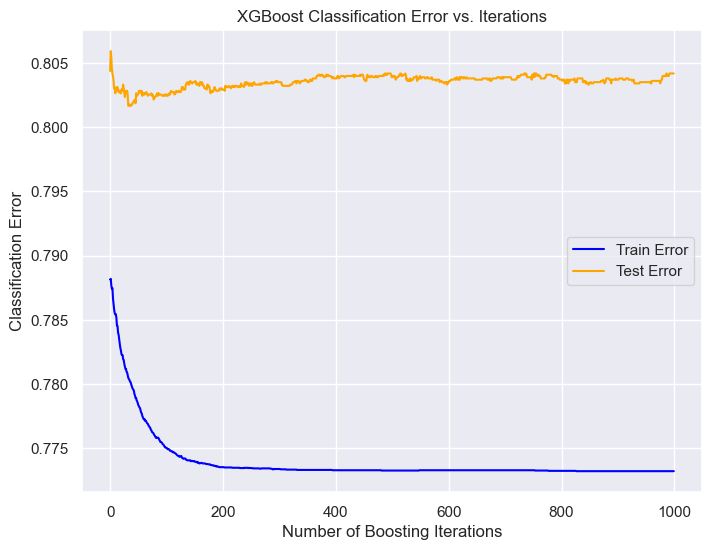

In [64]:
epochs = len(results['train-merror-mean'])  # Replace with actual key names
x_axis = range(0, epochs)

# Plot classification error
plt.figure(figsize=(8, 6))
plt.plot(x_axis, results['train-merror-mean'], label='Train Error', color='blue')
plt.plot(x_axis, results['test-merror-mean'], label='Test Error', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

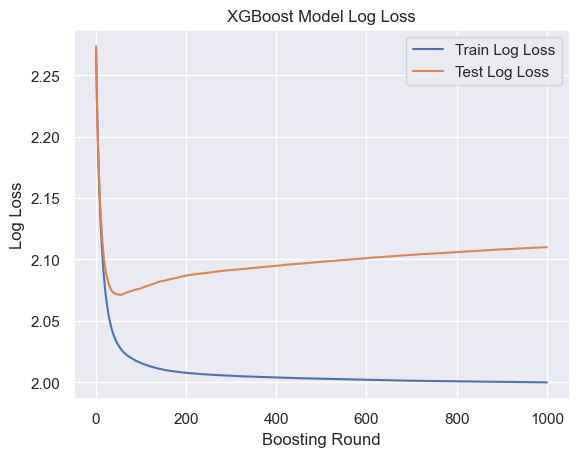

In [65]:
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Log Loss')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test Log Loss')

plt.title('XGBoost Model Log Loss')
plt.xlabel('Boosting Round')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [66]:
params = {"objective": "multi:softprob", "tree_method" : "hist", "device" : "cuda", "num_class": 10}
n = 400

results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"],
)

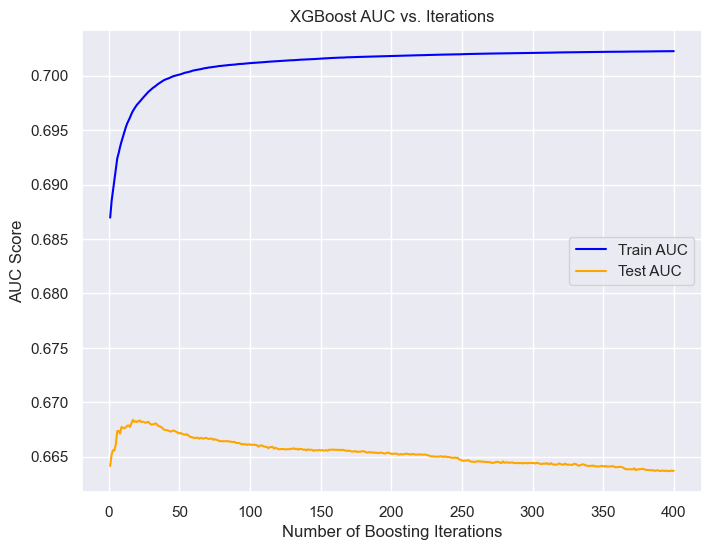

In [67]:
train_auc = results['train-auc-mean']
test_auc = results['test-auc-mean']

# Create x-axis (number of boosting iterations)
num_iterations = len(train_auc)
x_axis = range(1, num_iterations + 1)

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_auc, label='Train AUC', color='blue')
plt.plot(x_axis, test_auc, label='Test AUC', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('AUC Score')
plt.title('XGBoost AUC vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

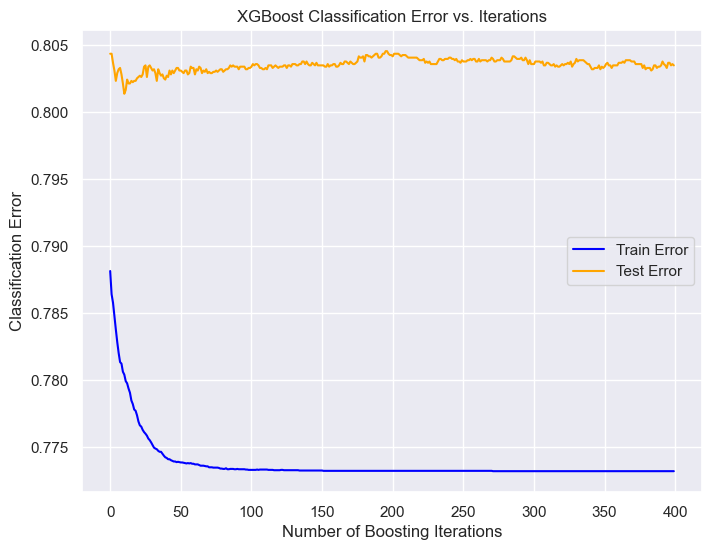

In [68]:
epochs = len(results['train-merror-mean'])  # Replace with actual key names
x_axis = range(0, epochs)

# Plot classification error
plt.figure(figsize=(8, 6))
plt.plot(x_axis, results['train-merror-mean'], label='Train Error', color='blue')
plt.plot(x_axis, results['test-merror-mean'], label='Test Error', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

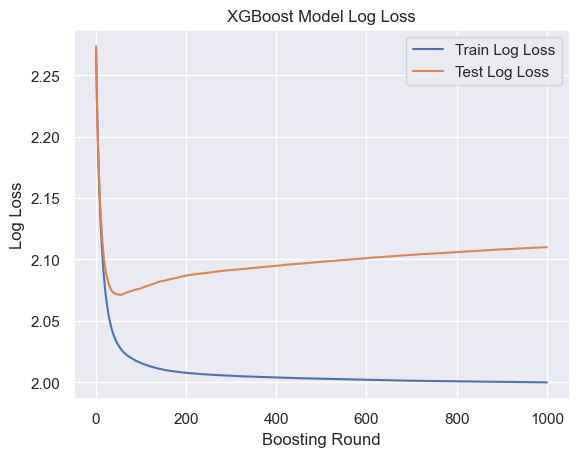

In [69]:
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Log Loss')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test Log Loss')

plt.title('XGBoost Model Log Loss')
plt.xlabel('Boosting Round')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [70]:
params = {
    "objective": "multi:softprob",
    "tree_method": "hist",
    "device": "cuda",
    "num_class": 10,
    "learning_rate": 0.1  # Set your desired learning rate here
}

n = 400

results = xgb.cv(
    params,
    dtrain_clf,
    num_boost_round=n,
    nfold=5,
    metrics=["mlogloss", "auc", "merror"],
)

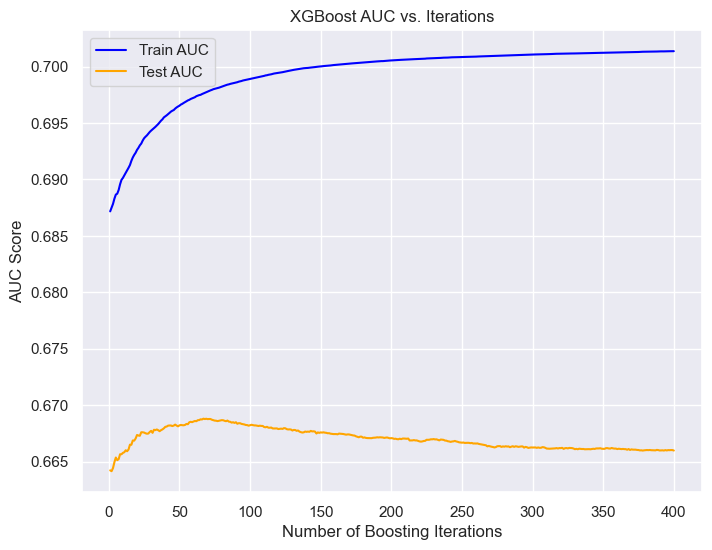

In [71]:
train_auc = results['train-auc-mean']
test_auc = results['test-auc-mean']

# Create x-axis (number of boosting iterations)
num_iterations = len(train_auc)
x_axis = range(1, num_iterations + 1)

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_auc, label='Train AUC', color='blue')
plt.plot(x_axis, test_auc, label='Test AUC', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('AUC Score')
plt.title('XGBoost AUC vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

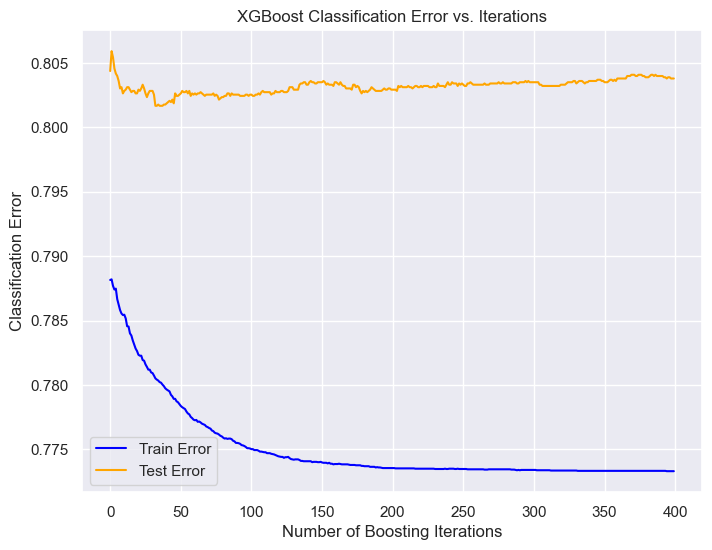

In [72]:
epochs = len(results['train-merror-mean'])  # Replace with actual key names
x_axis = range(0, epochs)

# Plot classification error
plt.figure(figsize=(8, 6))
plt.plot(x_axis, results['train-merror-mean'], label='Train Error', color='blue')
plt.plot(x_axis, results['test-merror-mean'], label='Test Error', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

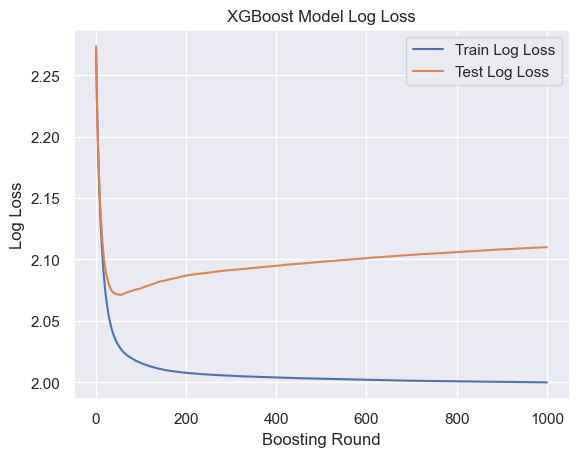

In [73]:
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Log Loss')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test Log Loss')

plt.title('XGBoost Model Log Loss')
plt.xlabel('Boosting Round')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [74]:
params = {
    "objective": "multi:softprob",
    "tree_method": "hist",
    "device": "cuda",
    "num_class": 10,
    "learning_rate": 0.3  # Set your desired learning rate here
}

n = 400

results = xgb.cv(
    params,
    dtrain_clf,
    num_boost_round=n,
    nfold=5,
    metrics=["mlogloss", "auc", "merror"],
)

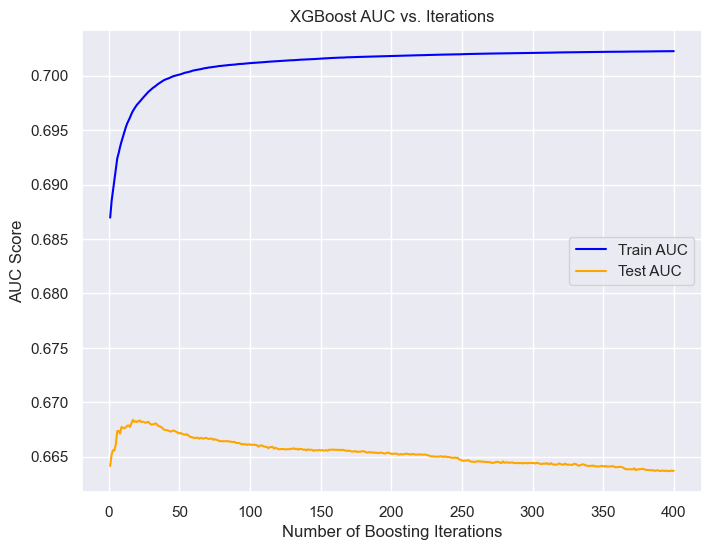

In [75]:
train_auc = results['train-auc-mean']
test_auc = results['test-auc-mean']

# Create x-axis (number of boosting iterations)
num_iterations = len(train_auc)
x_axis = range(1, num_iterations + 1)

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_auc, label='Train AUC', color='blue')
plt.plot(x_axis, test_auc, label='Test AUC', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('AUC Score')
plt.title('XGBoost AUC vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
params = {
    "objective": "multi:softprob",
    "tree_method": "hist",
    "device": "cuda",
    "num_class": 10,
    "learning_rate": 0.05   # Set your desired learning rate here
}

n = 400

results = xgb.cv(
    params,
    dtrain_clf,
    num_boost_round=n,
    nfold=5,
    metrics=["mlogloss", "auc", "merror"],
)

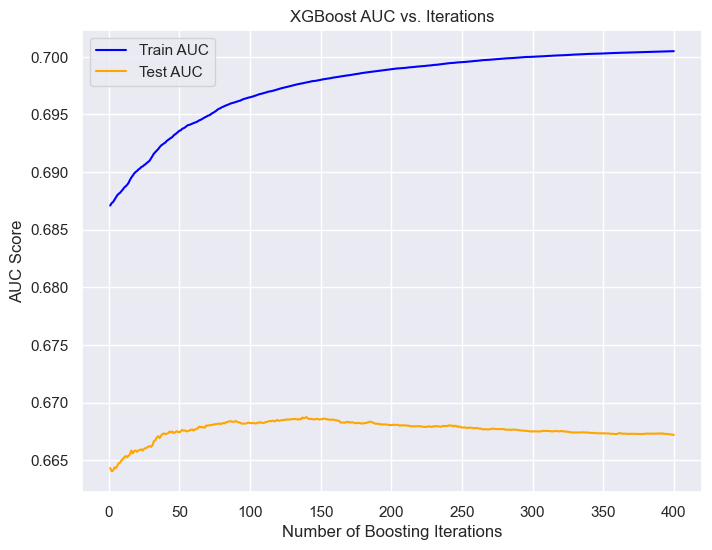

In [77]:
train_auc = results['train-auc-mean']
test_auc = results['test-auc-mean']

# Create x-axis (number of boosting iterations)
num_iterations = len(train_auc)
x_axis = range(1, num_iterations + 1)

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_auc, label='Train AUC', color='blue')
plt.plot(x_axis, test_auc, label='Test AUC', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('AUC Score')
plt.title('XGBoost AUC vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
params = {
    "objective": "multi:softprob",
    "tree_method": "hist",
    "device": "cuda",
    "num_class": 10,
    "learning_rate": 0.05   # Set your desired learning rate here
}

n = 800

results = xgb.cv(
    params,
    dtrain_clf,
    num_boost_round=n,
    nfold=5,
    metrics=["mlogloss", "auc", "merror"],
)

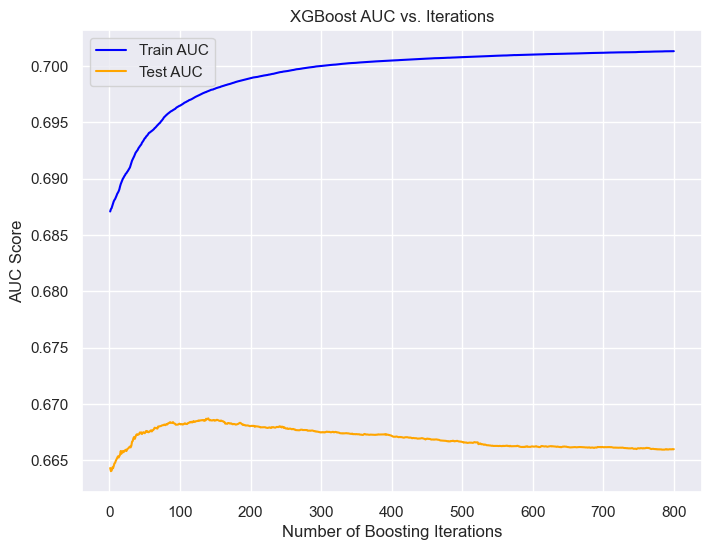

In [79]:
train_auc = results['train-auc-mean']
test_auc = results['test-auc-mean']

# Create x-axis (number of boosting iterations)
num_iterations = len(train_auc)
x_axis = range(1, num_iterations + 1)

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_auc, label='Train AUC', color='blue')
plt.plot(x_axis, test_auc, label='Test AUC', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('AUC Score')
plt.title('XGBoost AUC vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

### Overfitting 

In [80]:
params = {
    "objective": "multi:softprob",
    "tree_method": "hist",
    "device": "cuda",
    "num_class": 10,
    "learning_rate": 1   # Set your desired learning rate here
}

n = 800

results = xgb.cv(
    params,
    dtrain_clf,
    num_boost_round=n,
    nfold=10,
    metrics=["mlogloss", "auc", "merror"],
)

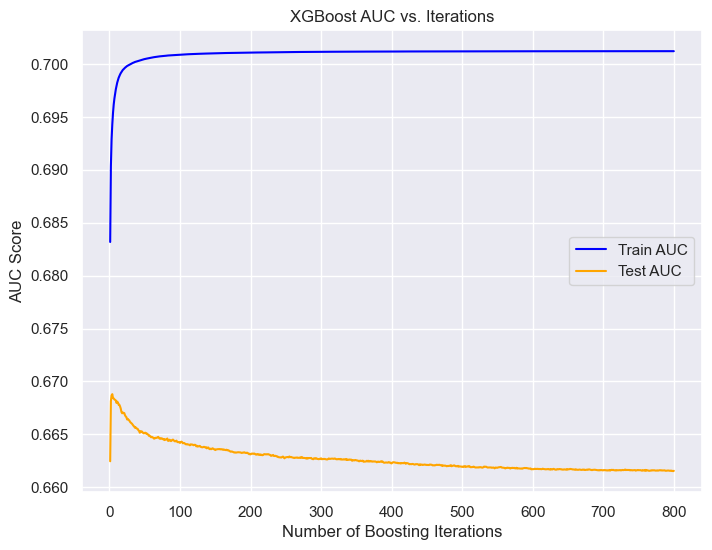

In [81]:
train_auc = results['train-auc-mean']
test_auc = results['test-auc-mean']

# Create x-axis (number of boosting iterations)
num_iterations = len(train_auc)
x_axis = range(1, num_iterations + 1)

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_auc, label='Train AUC', color='blue')
plt.plot(x_axis, test_auc, label='Test AUC', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('AUC Score')
plt.title('XGBoost AUC vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
params = {
    "objective": "multi:softprob",
    "tree_method": "hist",
    "device": "cuda",
    "num_class": 10,
    "learning_rate": 0.1   # Set your desired learning rate here
}

n = 800

results = xgb.cv(
    params,
    dtrain_clf,
    num_boost_round=n,
    nfold=10,
    metrics=["mlogloss", "auc", "merror"],
)

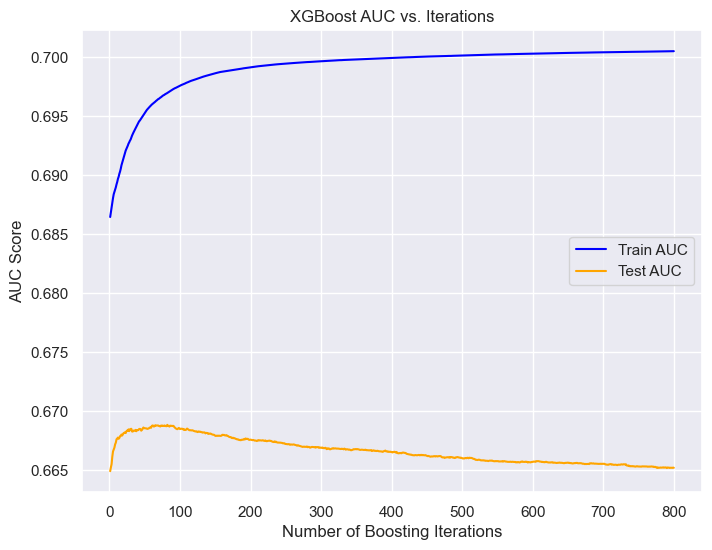

In [83]:
train_auc = results['train-auc-mean']
test_auc = results['test-auc-mean']

# Create x-axis (number of boosting iterations)
num_iterations = len(train_auc)
x_axis = range(1, num_iterations + 1)

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_auc, label='Train AUC', color='blue')
plt.plot(x_axis, test_auc, label='Test AUC', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('AUC Score')
plt.title('XGBoost AUC vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

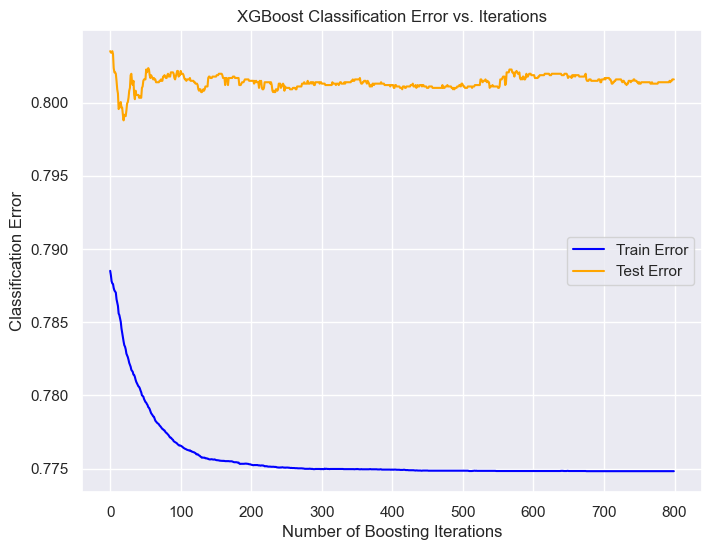

In [84]:
epochs = len(results['train-merror-mean'])  # Replace with actual key names
x_axis = range(0, epochs)

# Plot classification error
plt.figure(figsize=(8, 6))
plt.plot(x_axis, results['train-merror-mean'], label='Train Error', color='blue')
plt.plot(x_axis, results['test-merror-mean'], label='Test Error', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

### model is over fitted, use cross validation to fix

In [85]:
params = {
    "objective": "multi:softprob",
    "tree_method": "hist",
    "device": "cuda",
    "num_class": 10,
    "learning_rate": 0.1   # Set your desired learning rate here
}

n = 800

results_cv20 = xgb.cv(
    params,
    dtrain_clf,
    num_boost_round=n,
    nfold=20,
    metrics=["mlogloss", "auc", "merror"],
)

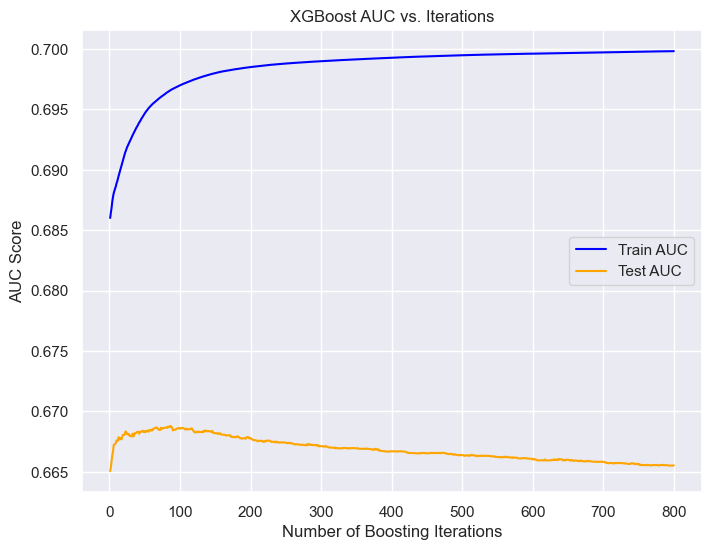

In [86]:
train_auc = results_cv20['train-auc-mean']
test_auc = results_cv20['test-auc-mean']

# Create x-axis (number of boosting iterations)
num_iterations = len(train_auc)
x_axis = range(1, num_iterations + 1)

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_auc, label='Train AUC', color='blue')
plt.plot(x_axis, test_auc, label='Test AUC', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('AUC Score')
plt.title('XGBoost AUC vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

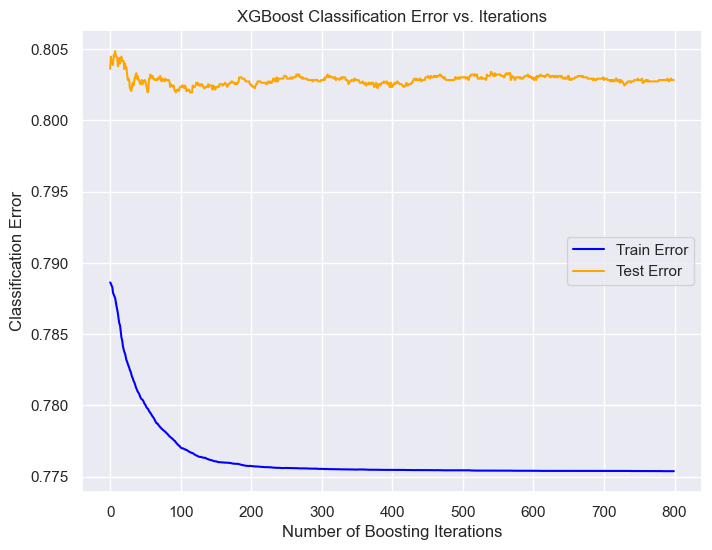

In [87]:
epochs = len(results_cv20['train-merror-mean'])  # Replace with actual key names
x_axis = range(0, epochs)

# Plot classification error
plt.figure(figsize=(8, 6))
plt.plot(x_axis, results_cv20['train-merror-mean'], label='Train Error', color='blue')
plt.plot(x_axis, results_cv20['test-merror-mean'], label='Test Error', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
params = {
    "objective": "multi:softprob",
    "tree_method": "hist",
    "device": "cuda",
    "num_class": 10,
    "learning_rate": 0.3   # Set your desired learning rate here
}

n = 400

results_cv30 = xgb.cv(
    params,
    dtrain_clf,
    num_boost_round=n,
    nfold=30,
    metrics=["mlogloss", "auc", "merror"],
)

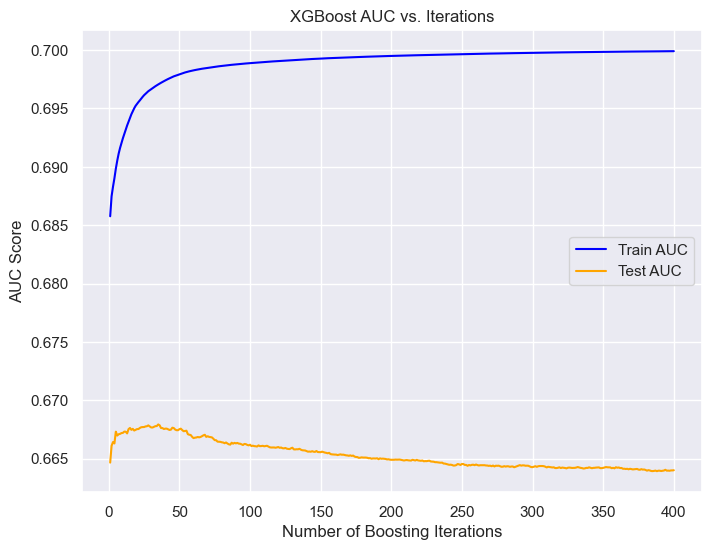

In [89]:
train_auc = results_cv30['train-auc-mean']
test_auc = results_cv30['test-auc-mean']

# Create x-axis (number of boosting iterations)
num_iterations = len(train_auc)
x_axis = range(1, num_iterations + 1)

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_auc, label='Train AUC', color='blue')
plt.plot(x_axis, test_auc, label='Test AUC', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('AUC Score')
plt.title('XGBoost AUC vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

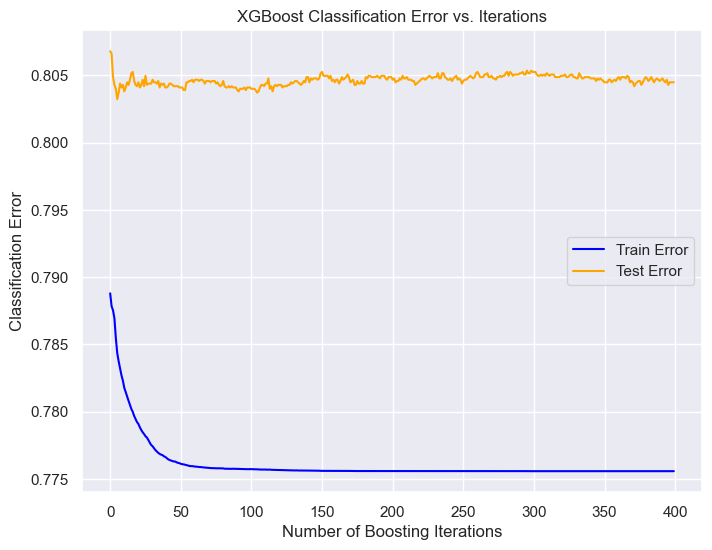

In [90]:
epochs = len(results_cv30['train-merror-mean'])  # Replace with actual key names
x_axis = range(0, epochs)

# Plot classification error
plt.figure(figsize=(8, 6))
plt.plot(x_axis, results_cv30['train-merror-mean'], label='Train Error', color='blue')
plt.plot(x_axis, results_cv30['test-merror-mean'], label='Test Error', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

### Best Salary (9 in salary range)

In [101]:
df_best_Salary = trimmed_df[trimmed_df['salary_range'] == "9"]

df_best_Salary

,experience_level,employee_residence,company_location,company_size,job_category,salary_range
9,3,83,72,3,4,9
11,3,83,72,3,7,9
17,0,83,72,0,4,9
25,3,83,72,3,7,9
37,3,83,72,3,7,9
...,...,...,...,...,...,...
14035,0,83,72,0,9,9
14054,3,83,72,3,4,9
14082,3,83,72,3,9,9
14132,3,83,11,3,9,9


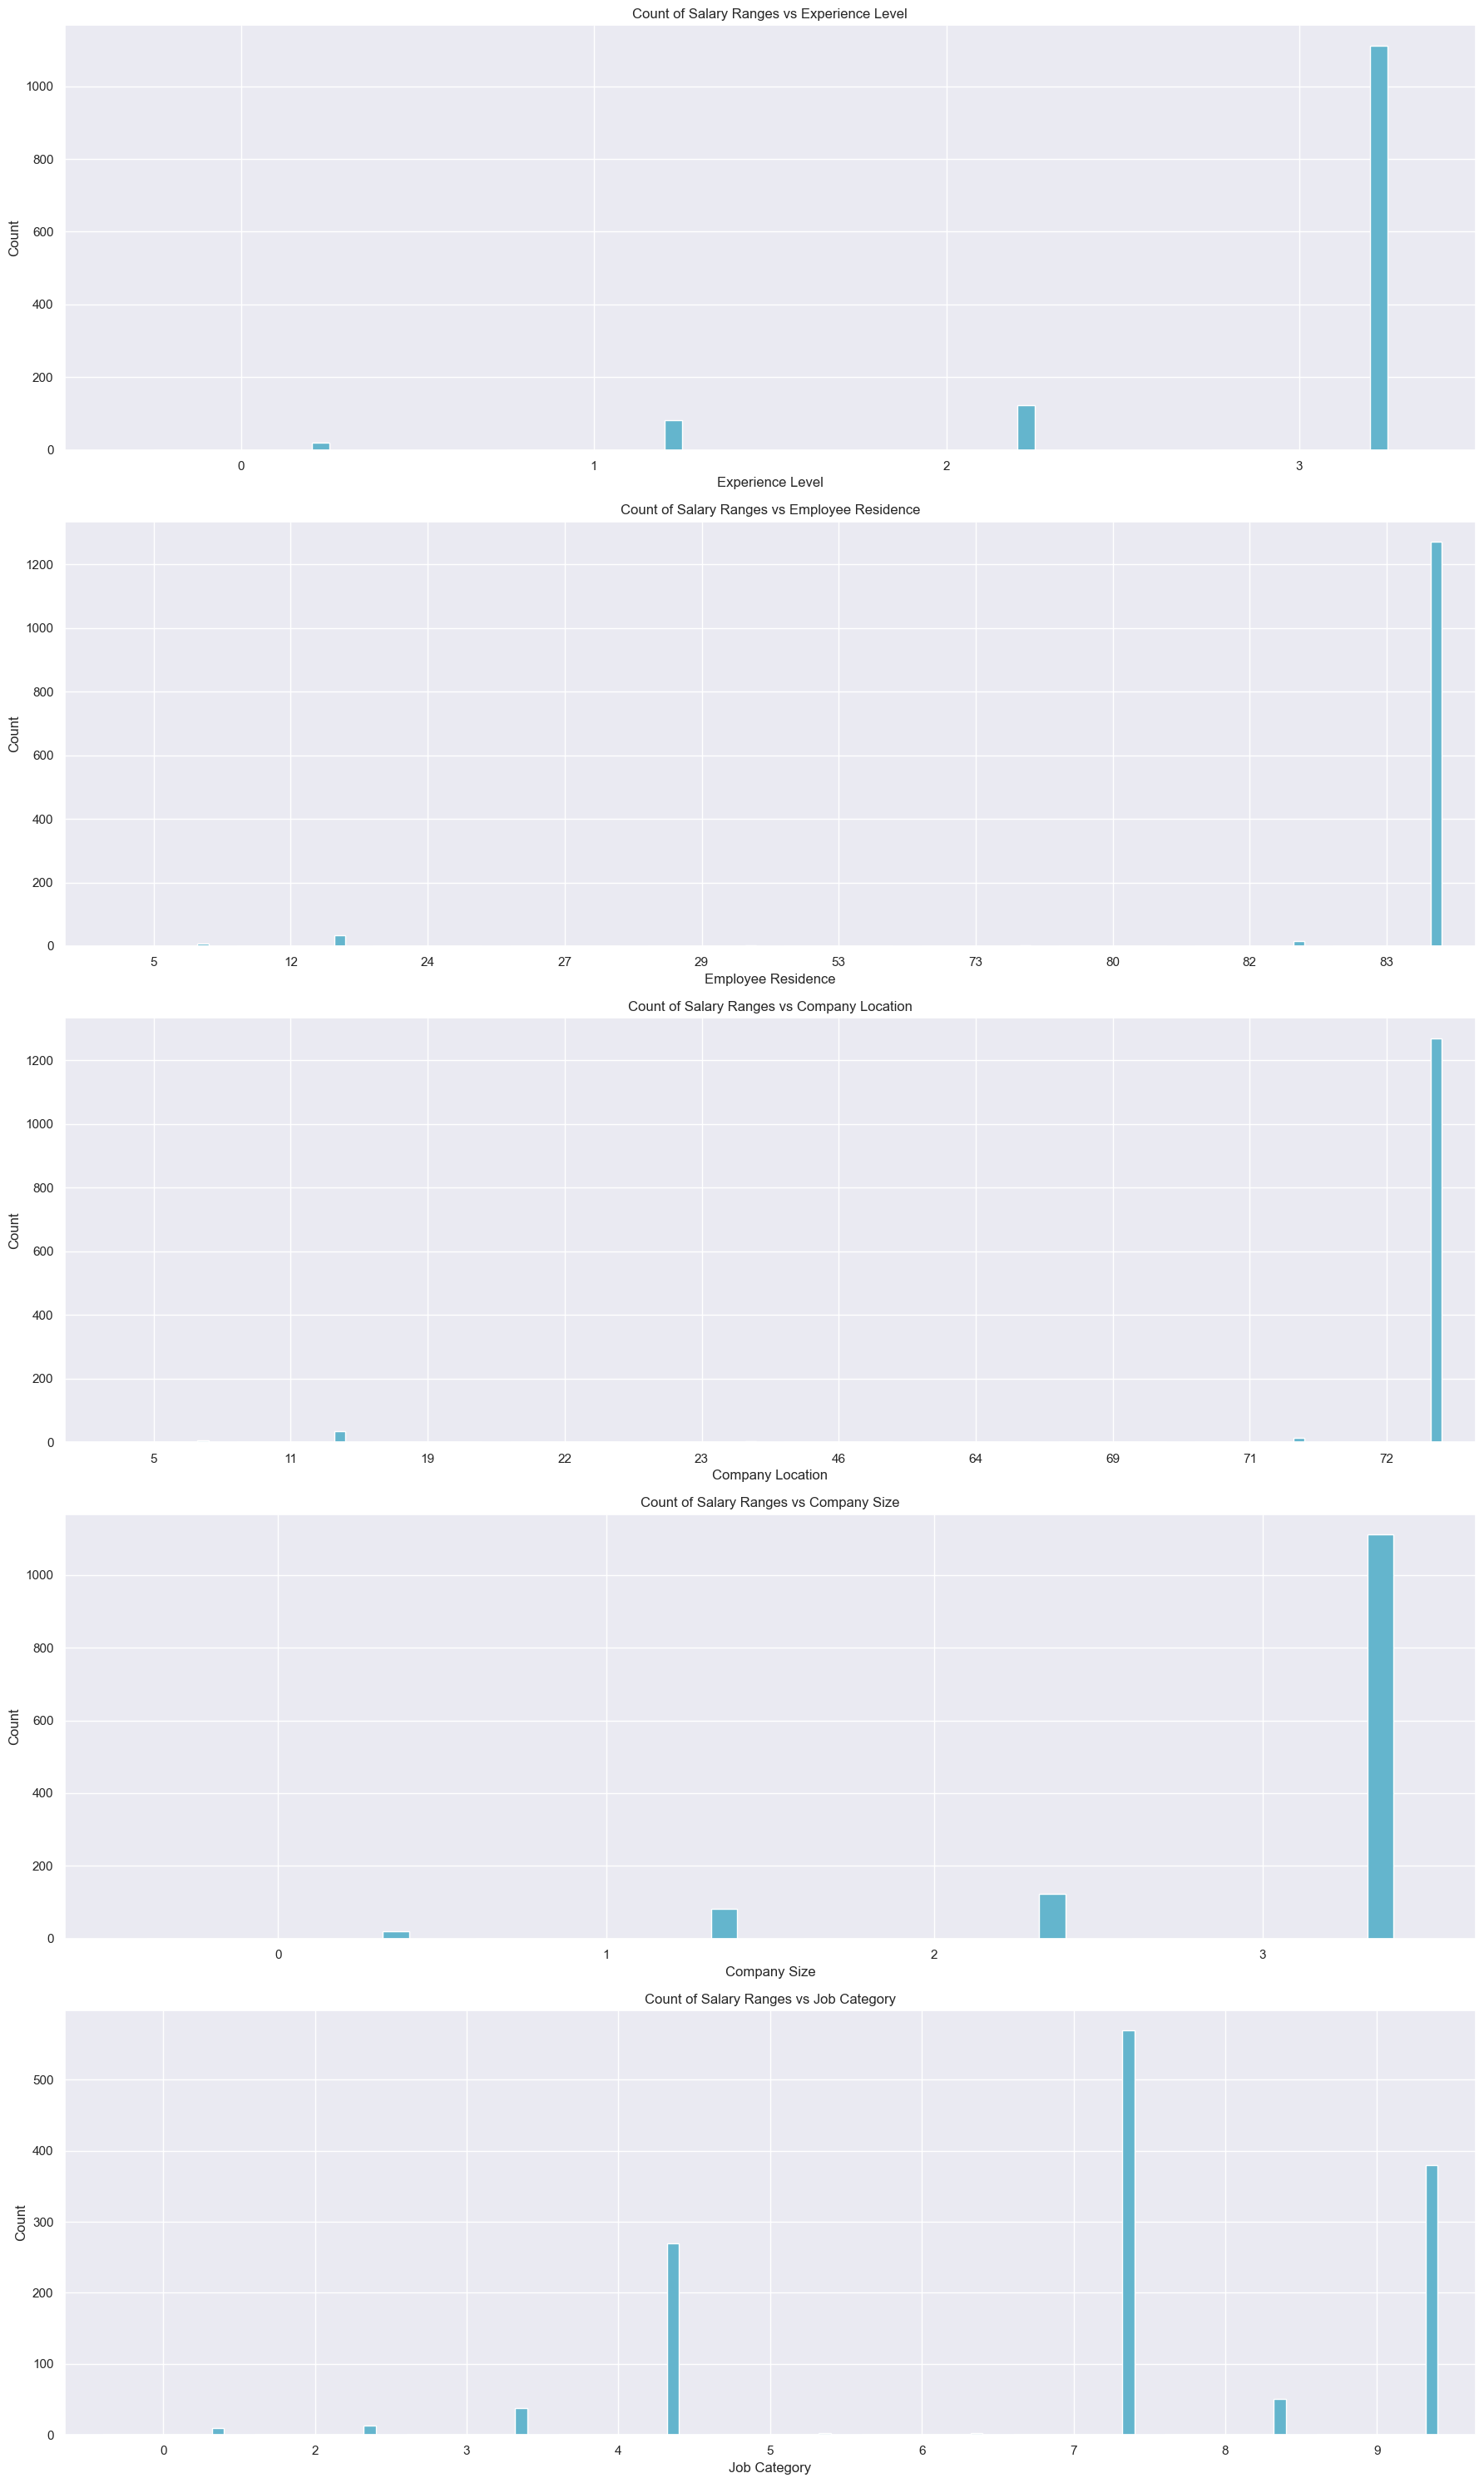

In [104]:
import matplotlib.pyplot as plt

salary_rangeVSexperience_level = df_best_Salary.groupby(['experience_level', 'salary_range']).size().unstack(fill_value=0)
salary_rangeVSresidence = df_best_Salary.groupby(['employee_residence', 'salary_range']).size().unstack(fill_value=0)
salary_rangeVSlocation = df_best_Salary.groupby(['company_location', 'salary_range']).size().unstack(fill_value=0)
salary_rangeVScompany_size= df_best_Salary.groupby(['company_size', 'salary_range']).size().unstack(fill_value=0)
salary_rangeVSjob_cat= df_best_Salary.groupby(['job_category', 'salary_range']).size().unstack(fill_value=0)

# Set up subplots
fig, axs = plt.subplots(5, 1, figsize=(18, 30))

# Plot 1: Count of Salary Ranges vs Experience Level
salary_rangeVSexperience_level.plot(kind='bar', ax=axs[0])
axs[0].set_title('Count of Salary Ranges vs Experience Level')
axs[0].set_xlabel('Experience Level')
axs[0].set_ylabel('Count')
axs[0].legend().remove()
axs[0].tick_params(axis='x', rotation=0)

# Plot 2: Count of Salary Ranges vs Employee Residence
salary_rangeVSresidence.plot(kind='bar', ax=axs[1], width=0.8)
axs[1].set_title('Count of Salary Ranges vs Employee Residence')
axs[1].set_xlabel('Employee Residence')
axs[1].set_ylabel('Count')
axs[1].legend().remove()
axs[1].tick_params(axis='x', rotation=0)

# Plot 3: Count of Salary Ranges vs Company Location
salary_rangeVSlocation.plot(kind='bar', ax=axs[2], width=0.8)
axs[2].set_title('Count of Salary Ranges vs Company Location')
axs[2].set_xlabel('Company Location')
axs[2].set_ylabel('Count')
axs[2].legend().remove()
axs[2].tick_params(axis='x', rotation=0)

# Plot 4: Count of Salary Ranges vs Company Size
salary_rangeVScompany_size.plot(kind='bar', ax=axs[3], width=0.8)
axs[3].set_title('Count of Salary Ranges vs Company Size')
axs[3].set_xlabel('Company Size')
axs[3].set_ylabel('Count')
axs[3].legend().remove()
axs[3].tick_params(axis='x', rotation=0)

# Plot 5: Count of Salary Ranges vs Job Category
salary_rangeVSjob_cat.plot(kind='bar', ax=axs[4], width=0.8)
axs[4].set_title('Count of Salary Ranges vs Job Category')
axs[4].set_xlabel('Job Category')
axs[4].set_ylabel('Count')
axs[4].legend().remove()
axs[4].tick_params(axis='x', rotation=0)

# Show plots
plt.tight_layout()
plt.show()


In [105]:
from sklearn.metrics import accuracy_score

# Train XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic')  # Specify parameters
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.203125


### Analysis after trying different combination of cross validation

The Area under ROC curve and multiclass error didn't change much leading me to believe that either XGBoost is not suitable for this dataset or there is something fundimentally wrong with the dataset. Moreover the accuracy of the predictions being at a measly 20% pushes me to find a new dataset for the problem

## Finding a new dataset since the accuracy is low

In [215]:
new_raw_Data = pd.read_csv('Salary Data.csv')
new_raw_Data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000


In [216]:
new_raw_Data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [217]:
new_salary_Data = new_raw_Data[['Salary']].copy() 
new_salary_Data

,Salary
0,90000
1,65000
2,150000
3,60000
4,200000
...,...
368,85000
369,170000
370,40000
371,90000


<Axes: >

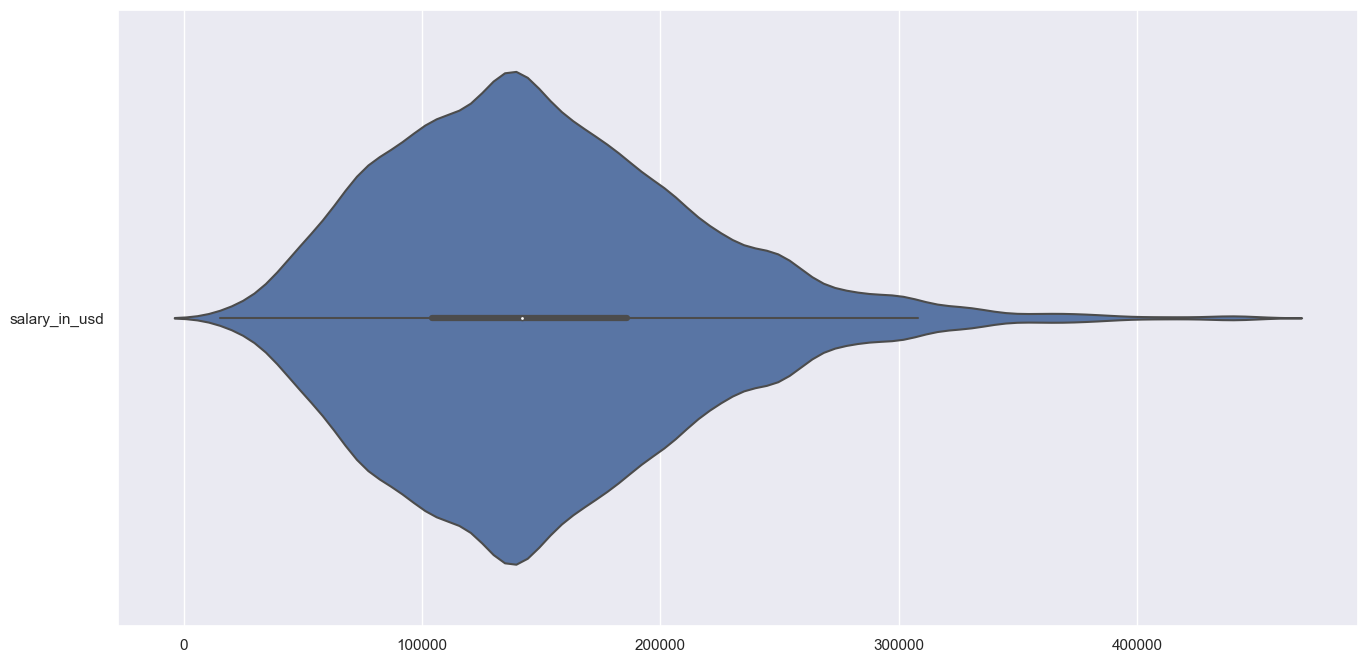

In [218]:
new_salary_Data = pd.DataFrame(new_raw_Data['Salary'])
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = salary_in_usd, orient = "h")

### cleaning the dataset

In [219]:
new_null_Data = new_raw_Data.isnull().sum()
print(new_null_Data)

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


The dataset is clean

### Removing the outliers

In [220]:
# Outliers in adjusted_salary
Q1_SalaryData = new_raw_Data['Salary'].quantile(0.25)
Q3_SalaryData = new_raw_Data['Salary'].quantile(0.75)
IQR_SalaryData = Q3_SalaryData - Q1_SalaryData

# Identify outliers in both columns
threshold = 1.5
outlier_mask_Salary = (new_raw_Data['Salary'] < Q1_SalaryData - threshold * IQR_SalaryData) | (new_raw_Data['Salary'] > Q3_SalaryData + threshold * IQR_SalaryData)

# Combine outlier masks for both columns
print(outlier_mask_Salary.sum())
# Remove outliers from the dataset
cleaned_df = new_raw_Data[~outlier_mask_Salary]

cleaned_df.shape

0


(373, 6)

There is no outliers, i will not be removing duplicate rows as well as it is not impossible for 2 person to have the same variables to receive the same salary

### Converting all categories to numbers

In [221]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame 'cleaned_df' with categorical columns 'Gender', 'Job Title', and 'Education Level'
le_gender = LabelEncoder()
le_job_title = LabelEncoder()
le_education_level = LabelEncoder()

cleaned_df['Gender'] = le_gender.fit_transform(cleaned_df['Gender'])
cleaned_df['Job Title'] = le_job_title.fit_transform(cleaned_df['Job Title'])
cleaned_df['Education Level'] = le_education_level.fit_transform(cleaned_df['Education Level'])

cleaned_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,1,0,159,5.0,90000
1,28,0,1,17,3.0,65000
2,45,1,2,130,15.0,150000
3,36,0,0,101,7.0,60000
4,52,1,1,22,20.0,200000
...,...,...,...,...,...,...
368,35,0,0,131,8.0,85000
369,43,1,1,30,19.0,170000
370,29,0,0,70,2.0,40000
371,34,1,0,137,7.0,90000


In [222]:
print("Gender mapping:")
print(dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))
print()

print("Job Title mapping:")
print(dict(zip(le_job_title.classes_, le_job_title.transform(le_job_title.classes_))))
print()

print("Education Level mapping:")
print(dict(zip(le_education_level.classes_, le_education_level.transform(le_education_level.classes_))))

Gender mapping:
{'Female': 0, 'Male': 1}

Job Title mapping:
{'Account Manager': 0, 'Accountant': 1, 'Administrative Assistant': 2, 'Business Analyst': 3, 'Business Development Manager': 4, 'Business Intelligence Analyst': 5, 'CEO': 6, 'Chief Data Officer': 7, 'Chief Technology Officer': 8, 'Content Marketing Manager': 9, 'Copywriter': 10, 'Creative Director': 11, 'Customer Service Manager': 12, 'Customer Service Rep': 13, 'Customer Service Representative': 14, 'Customer Success Manager': 15, 'Customer Success Rep': 16, 'Data Analyst': 17, 'Data Entry Clerk': 18, 'Data Scientist': 19, 'Digital Content Producer': 20, 'Digital Marketing Manager': 21, 'Director': 22, 'Director of Business Development': 23, 'Director of Engineering': 24, 'Director of Finance': 25, 'Director of HR': 26, 'Director of Human Capital': 27, 'Director of Human Resources': 28, 'Director of Marketing': 29, 'Director of Operations': 30, 'Director of Product Management': 31, 'Director of Sales': 32, 'Director of Sale

I can see what category is mapped to what number

### Basic Data Exploration

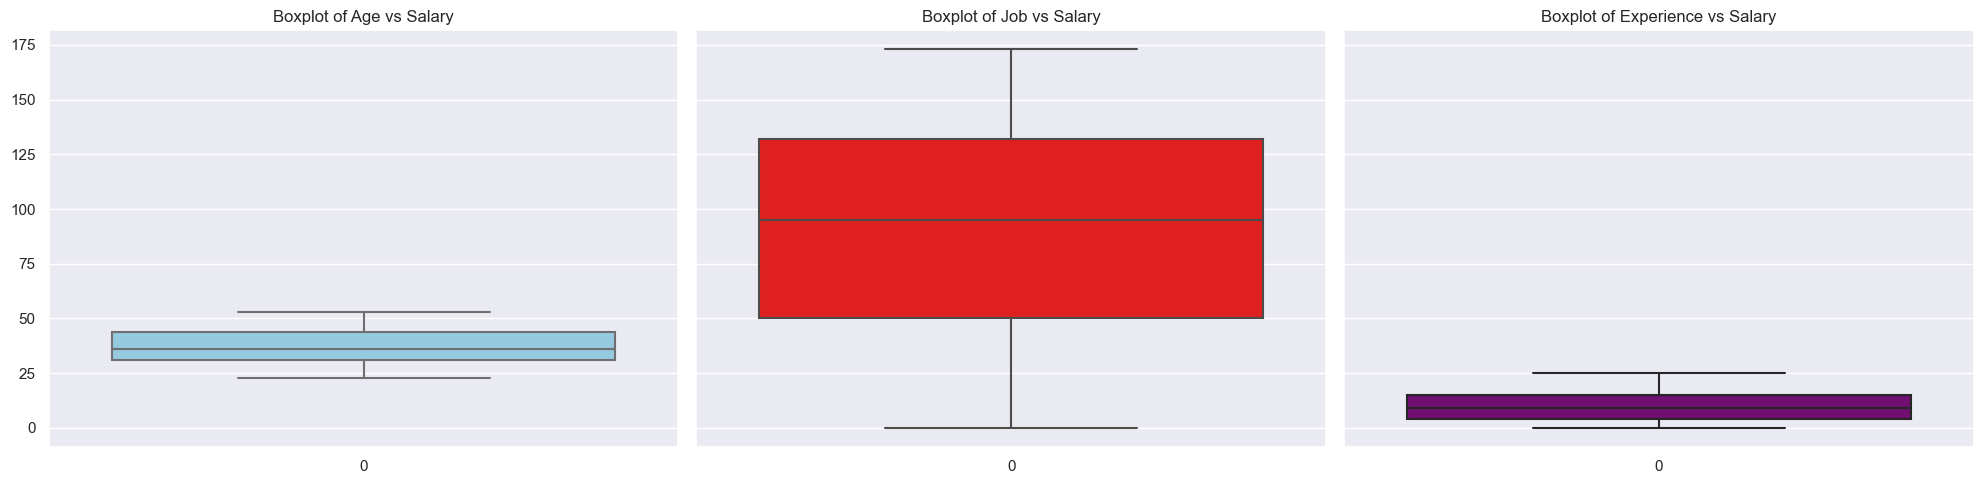

In [223]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

# Create boxplots for each variable
sb.boxplot(cleaned_df['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Age vs Salary')

sb.boxplot(cleaned_df['Job Title'], ax=axes[1], color='red')
axes[1].set_title('Boxplot of Job vs Salary')

sb.boxplot(cleaned_df['Years of Experience'], ax=axes[2], color='purple')
axes[2].set_title('Boxplot of Experience vs Salary')

plt.tight_layout()
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



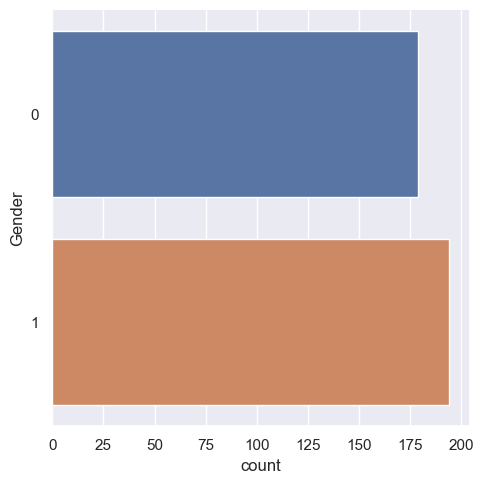

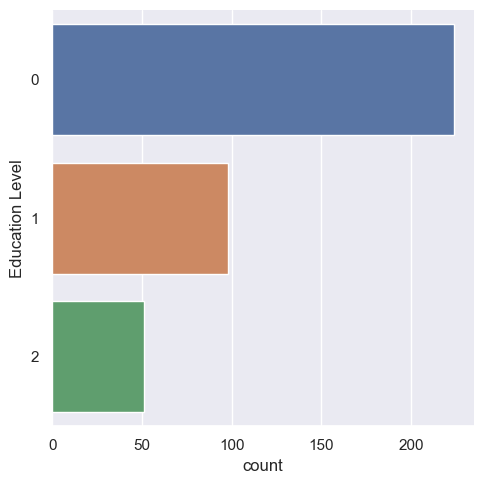

In [224]:
sb.catplot(y = "Gender", data = cleaned_df, kind = "count")

sb.catplot(y = "Education Level", data = cleaned_df, kind = "count")


Gender mapping:
{'Female': 0, 'Male': 1}

Education Level mapping:
{"Bachelor's": 0, "Master's": 1, 'PhD': 2}

I can see that there is a fairly even mixed of male to female ratio in the dataset and most of the data is based on fresh bachalor graduates

### converting salaries into bins

In [225]:
quantiles = [0, 1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 1]
bin_edges = [cleaned_df['Salary'].quantile(q) for q in quantiles]

# Convert the continuous salary variable into 7 discrete bins based on quantiles
salary_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
cleaned_df['salary_range'] = pd.cut(cleaned_df['Salary'], bins=bin_edges, labels=salary_labels, include_lowest=True)

cleaned_df = cleaned_df.drop('Salary', axis=1)
cleaned_df

,Age,Gender,Education Level,Job Title,Years of Experience,salary_range
0,32,1,0,159,5.0,4
1,28,0,1,17,3.0,3
2,45,1,2,130,15.0,7
3,36,0,0,101,7.0,2
4,52,1,1,22,20.0,9
...,...,...,...,...,...,...
368,35,0,0,131,8.0,3
369,43,1,1,30,19.0,8
370,29,0,0,70,2.0,0
371,34,1,0,137,7.0,4


In [226]:
for i in range(len(bin_edges) - 1):
    lower_bound = bin_edges[i]
    upper_bound = bin_edges[i + 1]
    salary_range = f"{salary_labels[i]}: [{lower_bound}, {upper_bound})"
    print(salary_range)

0: [350.0, 40000.0)
1: [40000.0, 50000.0)
2: [50000.0, 60000.0)
3: [60000.0, 85000.0)
4: [85000.0, 95000.0)
5: [95000.0, 110000.0)
6: [110000.0, 130000.0)
7: [130000.0, 150000.0)
8: [150000.0, 170000.0)
9: [170000.0, 250000.0)


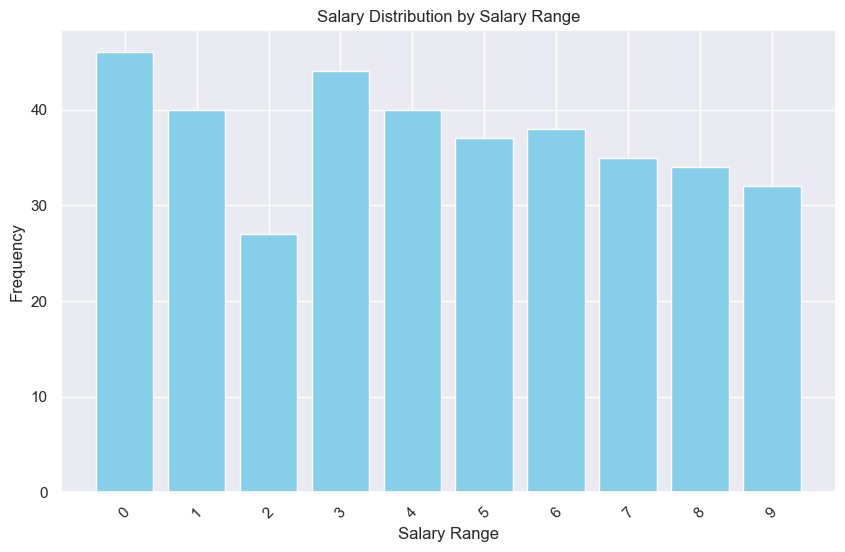

In [227]:
salary_bin_counts = cleaned_df['salary_range'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(salary_bin_counts.index, salary_bin_counts.values, color='skyblue')
plt.title('Salary Distribution by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

From this i can see the salary distribution in the dataset

### Finding Correlation

In [228]:
correlation_matrix = cleaned_df.corr()
correlation_matrix

,Age,Gender,Education Level,Job Title,Years of Experience,salary_range
Age,1.000000,-0.020324,0.562693,0.117629,0.979128,0.922412
Gender,-0.020324,1.000000,-0.044717,0.014307,0.002884,0.061331
Education Level,0.562693,-0.044717,1.000000,0.099934,0.590863,0.666779
Job Title,0.117629,0.014307,0.099934,1.000000,0.100162,0.198075
Years of Experience,0.979128,0.002884,0.590863,0.100162,1.000000,0.927203
salary_range,0.922412,0.061331,0.666779,0.198075,0.927203,1.000000


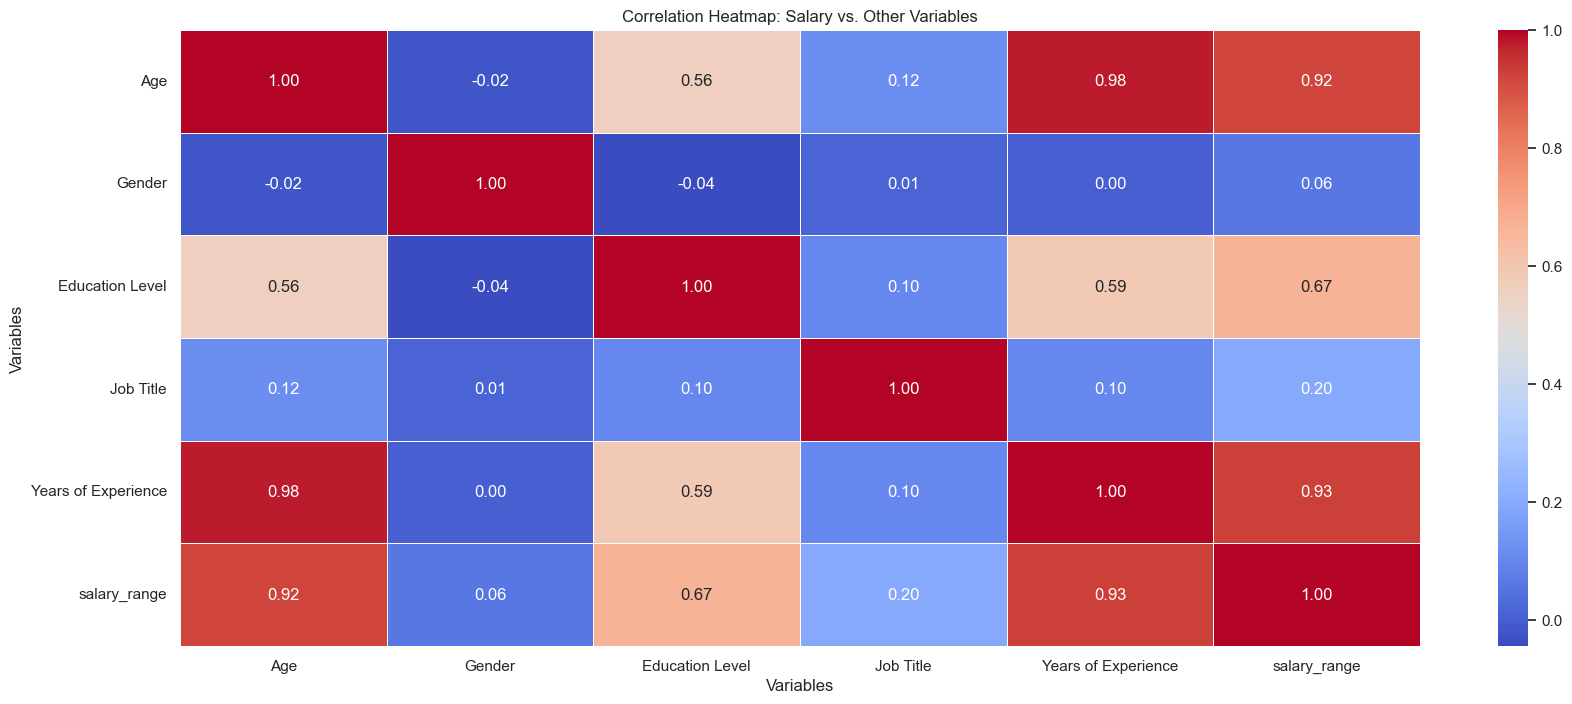

In [229]:
plt.figure(figsize=(20, 8))  # Set the figure size

# Plot the heatmap
sb.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Customize the plot (add labels, title, etc.)
plt.title("Correlation Heatmap: Salary vs. Other Variables")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Show the plot
plt.show()

From the heat map, i can conclude that gender does not affect salary 

### Splitting the data into Train and Test dataset (75:25)

In [230]:
from sklearn.model_selection import train_test_split

X = cleaned_df.drop('salary_range', axis=1)
y = cleaned_df[['salary_range']]

In [231]:
from sklearn.preprocessing import OrdinalEncoder

# Encode y to numeric
y_encoded = OrdinalEncoder().fit_transform(y)

y_encoded

array([[4.],
       [3.],
       [7.],
       [2.],
       [9.],
       [2.],
       [6.],
       [3.],
       [1.],
       [5.],
       [3.],
       [7.],
       [3.],
       [6.],
       [0.],
       [6.],
       [4.],
       [6.],
       [0.],
       [9.],
       [3.],
       [9.],
       [1.],
       [2.],
       [7.],
       [1.],
       [5.],
       [0.],
       [7.],
       [4.],
       [9.],
       [2.],
       [3.],
       [3.],
       [8.],
       [1.],
       [2.],
       [6.],
       [0.],
       [8.],
       [3.],
       [9.],
       [2.],
       [1.],
       [6.],
       [0.],
       [3.],
       [9.],
       [6.],
       [0.],
       [6.],
       [3.],
       [2.],
       [9.],
       [1.],
       [4.],
       [3.],
       [7.],
       [2.],
       [5.],
       [8.],
       [1.],
       [3.],
       [9.],
       [0.],
       [4.],
       [6.],
       [1.],
       [4.],
       [7.],
       [3.],
       [3.],
       [9.],
       [0.],
       [6.],
       [4.],
       [8.],

In [232]:
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to pd.Categorical
for col in cats:
   X[col] = X[col].astype('category')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=1, stratify=y_encoded)

In [233]:
X_train

,Age,Gender,Education Level,Job Title,Years of Experience
307,47,1,1,29,19.0
366,44,0,2,114,16.0
148,38,0,0,109,10.0
91,29,0,0,101,3.0
37,42,1,1,95,14.0
...,...,...,...,...,...
24,41,1,1,37,13.0
239,44,0,2,122,18.0
2,45,1,2,130,15.0
318,45,0,1,134,16.0


In [234]:
y_train

array([[8.],
       [8.],
       [3.],
       [0.],
       [6.],
       [2.],
       [6.],
       [0.],
       [8.],
       [9.],
       [6.],
       [0.],
       [1.],
       [0.],
       [5.],
       [9.],
       [5.],
       [6.],
       [4.],
       [1.],
       [1.],
       [1.],
       [5.],
       [1.],
       [0.],
       [8.],
       [9.],
       [3.],
       [2.],
       [7.],
       [0.],
       [2.],
       [8.],
       [8.],
       [4.],
       [9.],
       [4.],
       [8.],
       [5.],
       [3.],
       [9.],
       [3.],
       [0.],
       [3.],
       [9.],
       [6.],
       [9.],
       [1.],
       [6.],
       [4.],
       [2.],
       [3.],
       [2.],
       [4.],
       [8.],
       [1.],
       [3.],
       [2.],
       [3.],
       [1.],
       [5.],
       [2.],
       [3.],
       [0.],
       [9.],
       [6.],
       [1.],
       [7.],
       [3.],
       [6.],
       [9.],
       [2.],
       [0.],
       [5.],
       [1.],
       [9.],
       [1.],

### XGBoost (Extreme Gradient Boosting)

In [235]:
import xgboost as xgb

# Create regression matrices
dtrain_clf = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [236]:
params = {"objective": "multi:softprob", "tree_method" : "hist", "device" : "cuda", "num_class": 10}
n = 1000

results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"],
)

In [237]:
from sklearn.metrics import accuracy_score

# Train XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic')  # Specify parameters
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5957446808510638


This shows that there is about a 60% prediction accuracy to predict the test dataset using the train model, which is about 3 times better than the first dataset

In [238]:
results.keys()

Index(['train-mlogloss-mean', 'train-mlogloss-std', 'train-auc-mean',
       'train-auc-std', 'train-merror-mean', 'train-merror-std',
       'test-mlogloss-mean', 'test-mlogloss-std', 'test-auc-mean',
       'test-auc-std', 'test-merror-mean', 'test-merror-std'],
      dtype='object')

In [239]:
results['test-auc-mean'].mean()

0.9222692032427391

In [240]:
results['test-mlogloss-mean'].mean()

1.4072695207520232

In [241]:
results['test-merror-mean'].mean()

0.41119084415584417

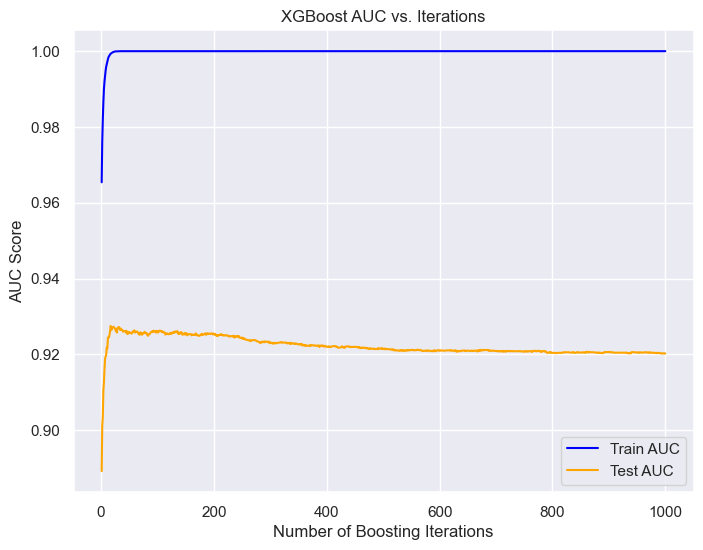

In [242]:
train_auc = results['train-auc-mean']
test_auc = results['test-auc-mean']

# Create x-axis (number of boosting iterations)
num_iterations = len(train_auc)
x_axis = range(1, num_iterations + 1)

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_auc, label='Train AUC', color='blue')
plt.plot(x_axis, test_auc, label='Test AUC', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('AUC Score')
plt.title('XGBoost AUC vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()


from this graph we can see that the area under curve for the test_auc reaaches the maximum around the 20th to 250th iteration before starting to fall to 0.92 auc starting after the 250th iteration and stablizing after the 600th iteration 

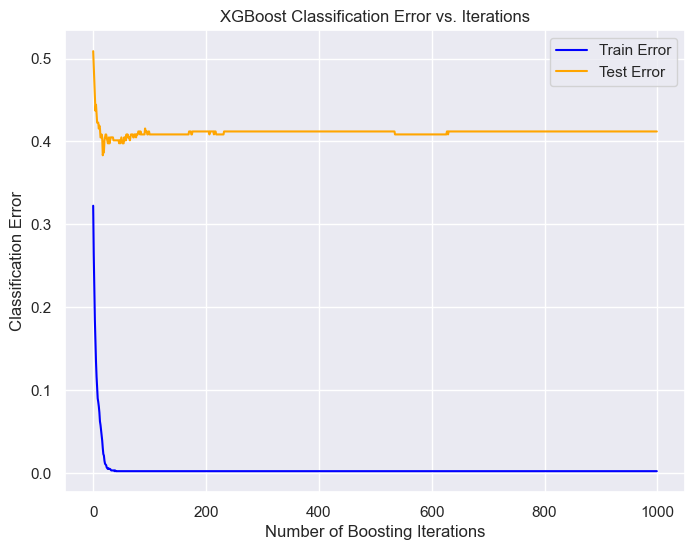

In [243]:
epochs = len(results['train-merror-mean'])  # Replace with actual key names
x_axis = range(0, epochs)

# Plot classification error
plt.figure(figsize=(8, 6))
plt.plot(x_axis, results['train-merror-mean'], label='Train Error', color='blue')
plt.plot(x_axis, results['test-merror-mean'], label='Test Error', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

This graph shows that about 40% of the test data points are misclassified across all evaluation steps during training which is half of what was seen in the first dataset

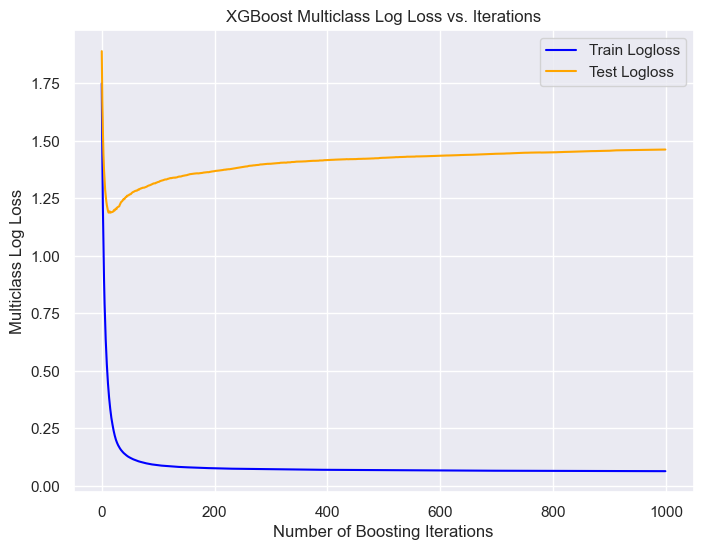

In [244]:
epochs = len(results['test-mlogloss-mean'])  # Replace with actual key names
x_axis = range(0, epochs)

# Plot classification error
plt.figure(figsize=(8, 6))
plt.plot(x_axis, results['train-mlogloss-mean'], label='Train Logloss', color='blue')
plt.plot(x_axis, results['test-mlogloss-mean'], label='Test Logloss', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('Multiclass Log Loss')
plt.title('XGBoost Multiclass Log Loss vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

This graph shows that there is about 1.25 multiclass logloss present which is about halved of what was seen in the first dataset

### To find the best factor contributing to the best salary

In [246]:
df_best_Salary = cleaned_df[cleaned_df['salary_range'] == "9"]

df_best_Salary

,Age,Gender,Education Level,Job Title,Years of Experience,salary_range
4,52,1,1,22,20.0,9
19,51,1,0,102,22.0,9
21,47,1,1,172,19.0,9
30,50,1,0,6,25.0,9
41,48,1,1,88,18.0,9
47,45,0,1,29,16.0,9
53,47,1,1,171,19.0,9
63,47,1,2,115,21.0,9
72,45,1,2,99,16.0,9
78,48,0,1,42,20.0,9


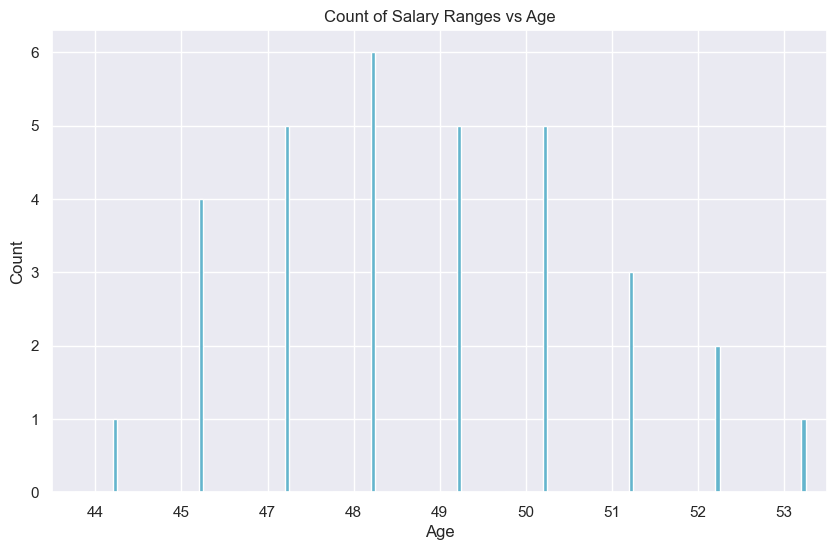

The category with the highest count is '48' with a count of 6.


In [137]:
salary_range_vs_Age = df_best_Salary.groupby(['Age', 'salary_range']).size().unstack(fill_value=0)

# Plot the count of salary ranges for each experience level
ax = salary_range_vs_Age.plot(kind='bar', figsize=(10, 6))
ax.legend().remove()  # Remove the legend
plt.title('Count of Salary Ranges vs Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Find the experience level with the highest count of a particular salary range
max_count_category = salary_range_vs_Age.idxmax().max()
max_count = salary_range_vs_Age.max().max()

print(f"The category with the highest count is '{max_count_category}' with a count of {max_count}.")

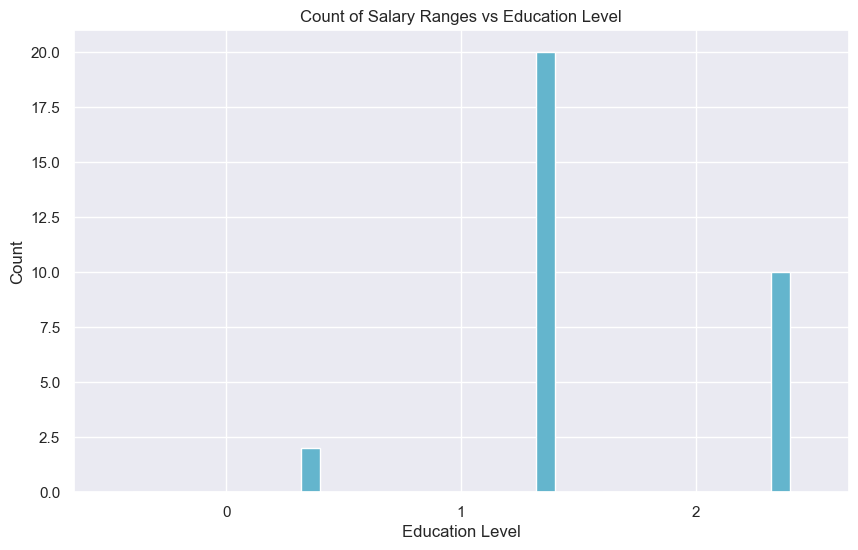

The category with the highest count is '1' with a count of 20.


In [138]:
salary_range_vs_Education = df_best_Salary.groupby(['Education Level', 'salary_range']).size().unstack(fill_value=0)

# Plot the count of salary ranges for each residence
ax = salary_range_vs_Education.plot(kind='bar', figsize=(10, 6), width=0.8) 
ax.legend().remove()  # Remove the legend
plt.title('Count of Salary Ranges vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Find the residence with the highest count of a particular salary range
max_count_category = salary_range_vs_Education.idxmax().max()
max_count = salary_range_vs_Education.max().max()

print(f"The category with the highest count is '{max_count_category}' with a count of {max_count}.")

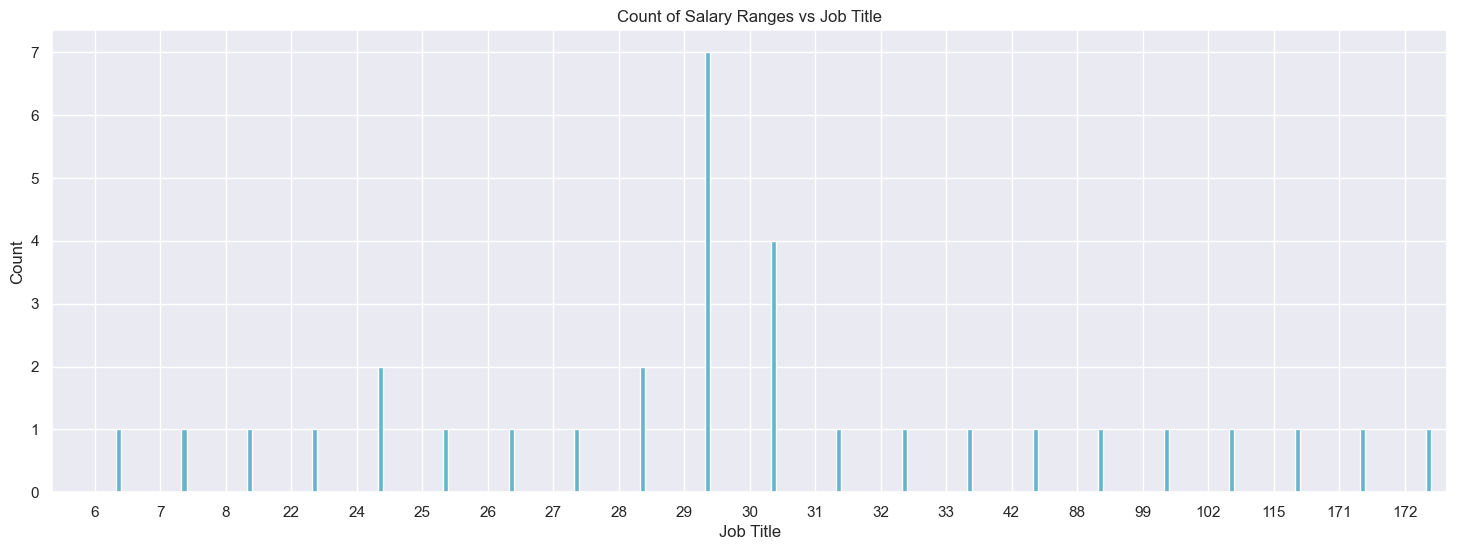

The category with the highest count is '29' with a count of 7.


In [139]:
salary_range_vs_JobTitle = df_best_Salary.groupby(['Job Title', 'salary_range']).size().unstack(fill_value=0)

# Plot the count of salary ranges for each residence
ax = salary_range_vs_JobTitle.plot(kind='bar', figsize=(18, 6), width=0.8) 
ax.legend().remove()  # Remove the legend
plt.title('Count of Salary Ranges vs Job Title')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Find the residence with the highest count of a particular salary range
max_count_category = salary_range_vs_JobTitle.idxmax().max()
max_count = salary_range_vs_JobTitle.max().max()

print(f"The category with the highest count is '{max_count_category}' with a count of {max_count}.")

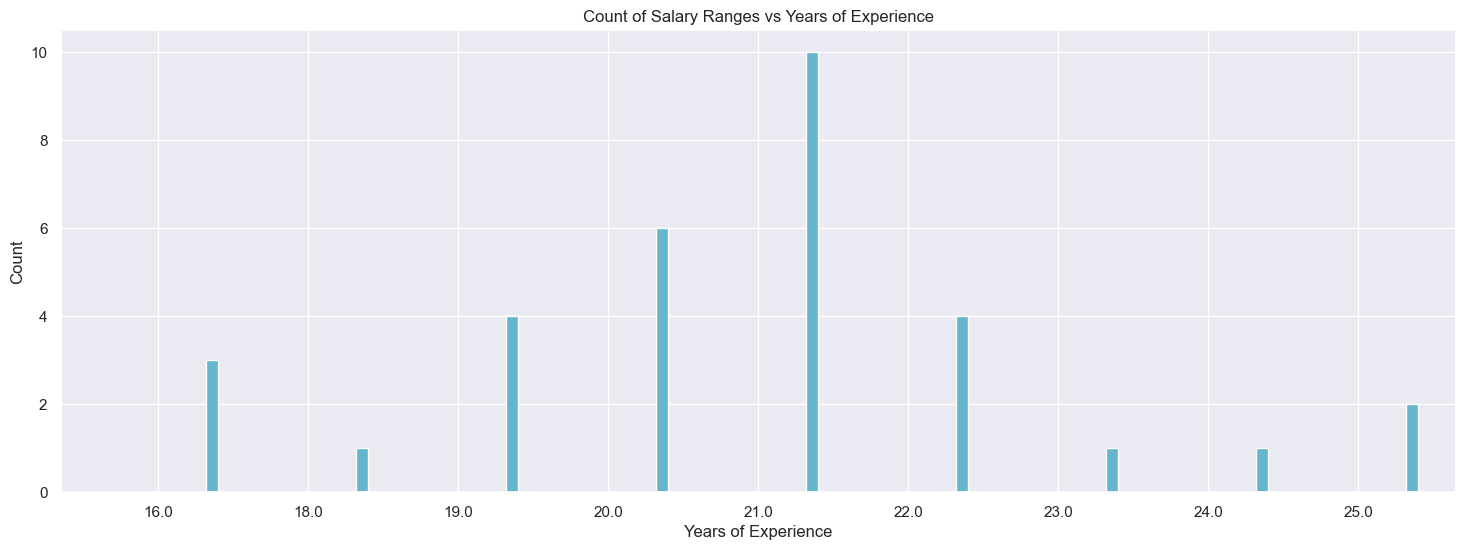

The category with the highest count is '21.0' with a count of 10.


In [140]:
salary_range_vs_Experience = df_best_Salary.groupby(['Years of Experience', 'salary_range']).size().unstack(fill_value=0)

# Plot the count of salary ranges for each residence
ax = salary_range_vs_Experience.plot(kind='bar', figsize=(18, 6), width=0.8) 
ax.legend().remove()  # Remove the legend
plt.title('Count of Salary Ranges vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Find the residence with the highest count of a particular salary range
max_count_category = salary_range_vs_Experience.idxmax().max()
max_count = salary_range_vs_Experience.max().max()

print(f"The category with the highest count is '{max_count_category}' with a count of {max_count}.")

From these bar graph i found out that in order to get the highest salary, u have to be 48 years old, with a master's degree, Director of marketing and with 21 years of experience, but it is not feasible to those who just graduated. Therefore i will set the salary range to 3, which is still good for a starting pay

### Salary Range 3

In [261]:
df_best_Salary = cleaned_df[cleaned_df['salary_range'] == "2"]

df_best_Salary

,Age,Gender,Education Level,Job Title,Years of Experience,salary_range
3,36,0,0,101,7.0,2
5,29,1,0,81,2.0,2
23,36,0,0,98,9.0,2
31,31,0,0,1,4.0,2
36,35,0,0,39,7.0,2
42,30,1,0,85,3.0,2
52,40,0,0,34,12.0,2
58,30,0,0,156,4.0,2
79,30,0,0,9,3.0,2
89,31,0,0,82,6.0,2


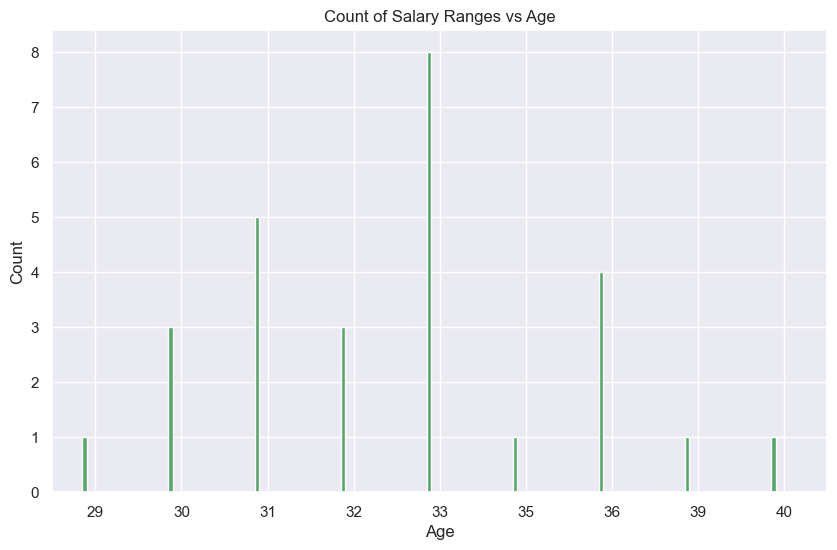

The category with the highest count is '33' with a count of 8.


In [262]:
salary_range_vs_Age = df_best_Salary.groupby(['Age', 'salary_range']).size().unstack(fill_value=0)

# Plot the count of salary ranges for each experience level
ax = salary_range_vs_Age.plot(kind='bar', figsize=(10, 6))
ax.legend().remove()  # Remove the legend
plt.title('Count of Salary Ranges vs Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Find the experience level with the highest count of a particular salary range
max_count_category = salary_range_vs_Age.idxmax().max()
max_count = salary_range_vs_Age.max().max()

print(f"The category with the highest count is '{max_count_category}' with a count of {max_count}.")

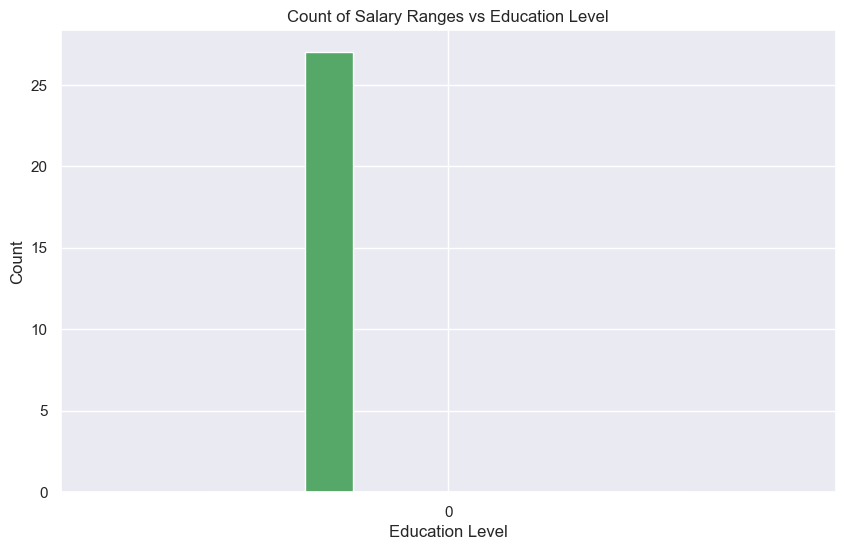

The category with the highest count is '0' with a count of 27.


In [263]:
salary_range_vs_Education = df_best_Salary.groupby(['Education Level', 'salary_range']).size().unstack(fill_value=0)

# Plot the count of salary ranges for each residence
ax = salary_range_vs_Education.plot(kind='bar', figsize=(10, 6), width=0.8) 
ax.legend().remove()  # Remove the legend
plt.title('Count of Salary Ranges vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Find the residence with the highest count of a particular salary range
max_count_category = salary_range_vs_Education.idxmax().max()
max_count = salary_range_vs_Education.max().max()

print(f"The category with the highest count is '{max_count_category}' with a count of {max_count}.")

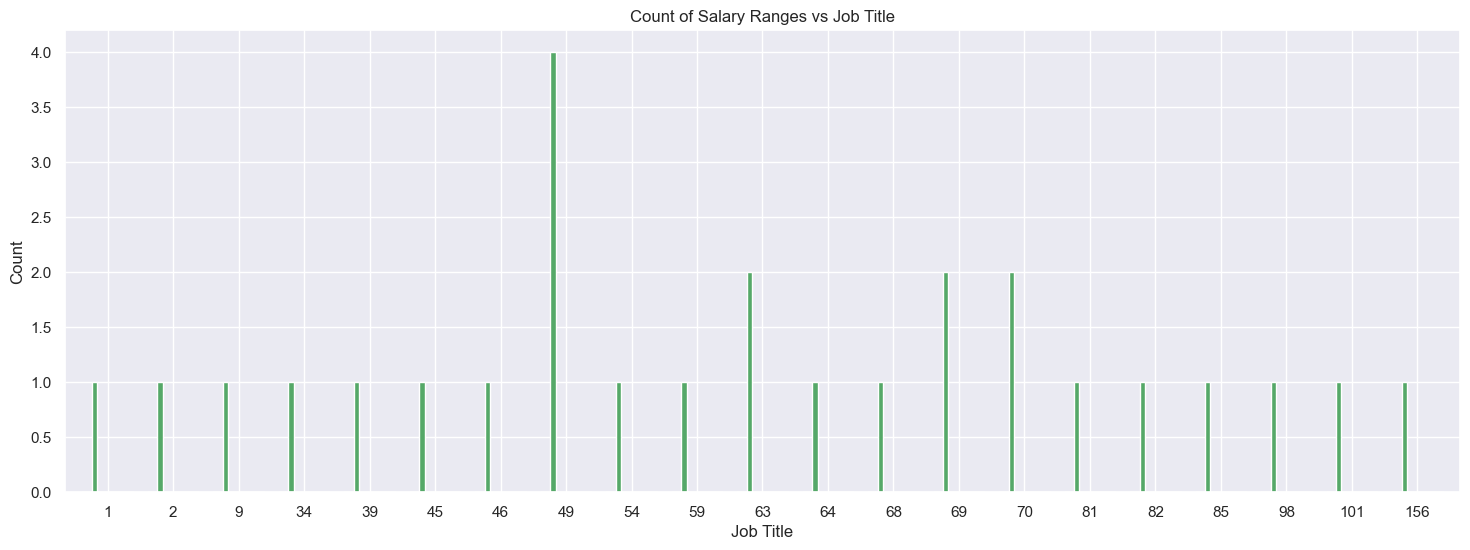

The category with the highest count is '49' with a count of 4.


In [264]:
salary_range_vs_JobTitle = df_best_Salary.groupby(['Job Title', 'salary_range']).size().unstack(fill_value=0)

# Plot the count of salary ranges for each residence
ax = salary_range_vs_JobTitle.plot(kind='bar', figsize=(18, 6), width=0.8) 
ax.legend().remove()  # Remove the legend
plt.title('Count of Salary Ranges vs Job Title')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Find the residence with the highest count of a particular salary range
max_count_category = salary_range_vs_JobTitle.idxmax().max()
max_count = salary_range_vs_JobTitle.max().max()

print(f"The category with the highest count is '{max_count_category}' with a count of {max_count}.")

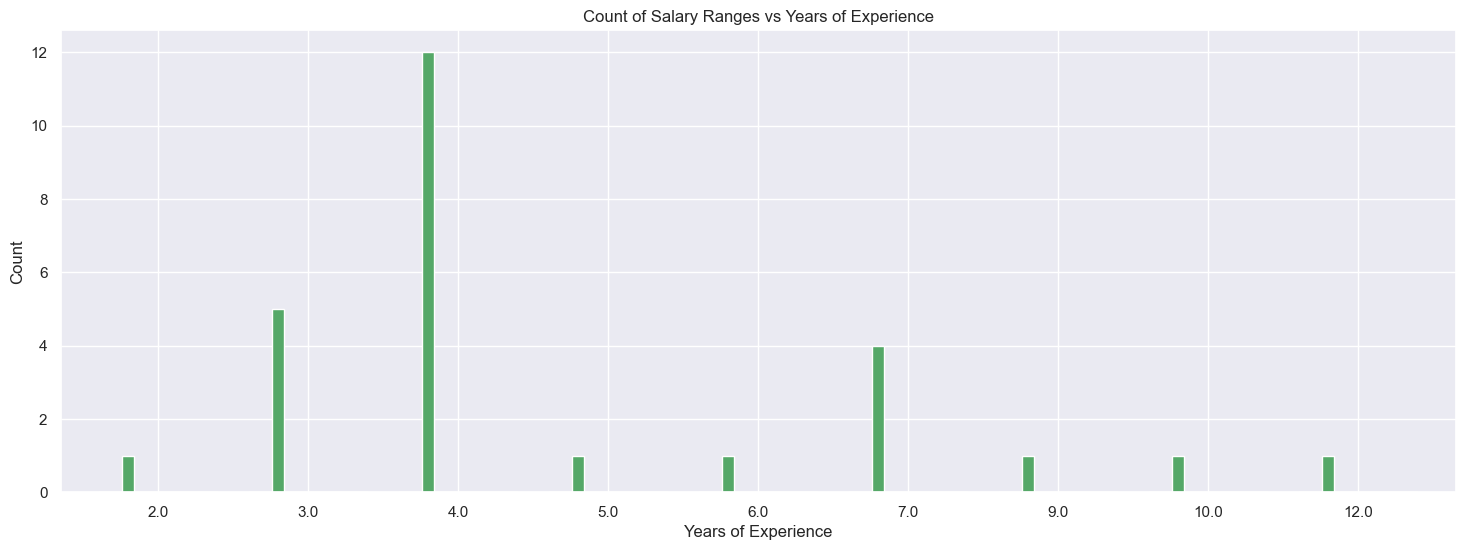

The category with the highest count is '4.0' with a count of 12.


In [265]:
salary_range_vs_Experience = df_best_Salary.groupby(['Years of Experience', 'salary_range']).size().unstack(fill_value=0)

# Plot the count of salary ranges for each residence
ax = salary_range_vs_Experience.plot(kind='bar', figsize=(18, 6), width=0.8) 
ax.legend().remove()  # Remove the legend
plt.title('Count of Salary Ranges vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Find the residence with the highest count of a particular salary range
max_count_category = salary_range_vs_Experience.idxmax().max()
max_count = salary_range_vs_Experience.max().max()

print(f"The category with the highest count is '{max_count_category}' with a count of {max_count}.")

The best job in the salary range of 2, from 94k to 112k per annual is junior business developer with a bachelors degree and 4 years of experience

### Analysis of XGBoost 

test->mean

- AUC = 0.9222692032427391
- Multiclass error = 1.4072695207520232
- Multiclass logloss = 0.41119084415584417

Accuracy: 0.5957446808510638

since the AUC is very close to 1 and the error and logloss significatly improved from the first dataset, i can conclude that the second salary dataset is a much better dataset to be used to predict salary using 

- Age
- Education Level
- Job Title
- Years of Experience

suprisingly, gender does not play a role in determining salary since it has a negligable correlation with salary

### Multinormial Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape y to a 1-dimensional array
y_train = y_train.ravel()
y_test = y_test.ravel()

# Instantiate multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

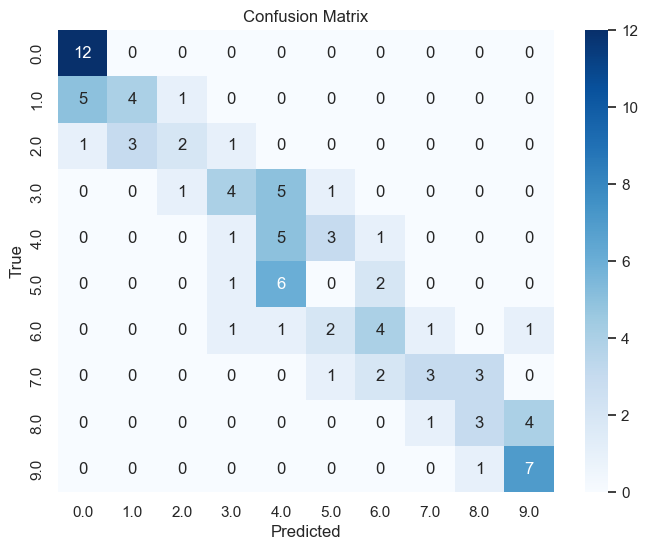

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        12
         1.0       0.57      0.40      0.47        10
         2.0       0.50      0.29      0.36         7
         3.0       0.50      0.36      0.42        11
         4.0       0.29      0.50      0.37        10
         5.0       0.00      0.00      0.00         9
         6.0       0.44      0.40      0.42        10
         7.0       0.60      0.33      0.43         9
         8.0       0.43      0.38      0.40         8
         9.0       0.58      0.88      0.70         8

    accuracy                           0.47        94
   macro avg       0.46      0.45      0.44        94
weighted avg       0.46      0.47      0.45        94



In [142]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Convert model.classes_ to a list of strings
target_names = [str(label) for label in model.classes_]

# Create classification report
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:")
print(report)


In [143]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.46808510638297873


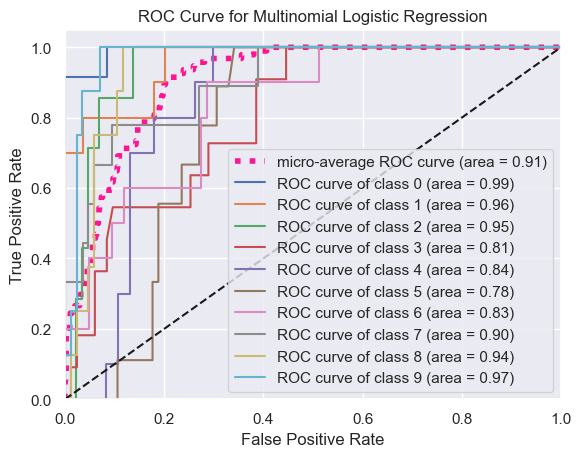

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test_scaled)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), model.predict_proba(X_test_scaled).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### Analysis (Multinormial Logistic Regression)


Accuracy: 0.46808510638297873

Even though the accuracy is slightly lower than xgboost, but there is close to no false positives or false negatives

It is interesting to see that most of of the results falls into either true positives and true negatives creating a straight line in the confusion matrix

### Conclusion

Models Used:
- XGBoost
- Multinormial Logistic Regression

What I learned:
- work title, company location, experience level and education level plays a significant role in determinating a good salary
- xgboost
- Multinormial Logistic Regression from sklearn
- Collaborating on github
- After an amount of iterations, the accuracy, area under roc curve, multiclass error slows down by alot
- Not having a good dataset that covers all the variables evenly will mess up the prediction

References:
- https://www.datacamp.com/tutorial/xgboost-in-python
- https://xgboost.readthedocs.io/en/stable/
- https://www.linkedin.com/pulse/mastering-xgboost-from-basics-advanced-techniques-complete-nick-gupta/
- https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://machinelearningmastery.com/multinomial-logistic-regression-with-python/